# Sprint Project 8. Study of the Moscow Food Service Market

- Author: Maria Gryaznova
- Date: 26.01.2025

### Project Goals and Objectives

**Goal:** To explore the Moscow food service market in order to choose the optimal concept and location for a new establishment.

**Objectives:**
1. Load the data and familiarize with its contents.
2. Perform data preprocessing.
3. Conduct an exploratory data analysis to answer key questions:
   - what categories of establishments are represented and how are they distributed;
   - how are establishments distributed across administrative districts of Moscow;
   - the ratio of chain to independent establishments, and which categories are more likely to be chains;
   - characteristics of seating capacity across categories;
   - differences in ratings of establishments and what they correlate with;
   - which chains are the most popular and which categories they belong to;
   - variation of the average bill depending on the districts of Moscow;
4. Formulate final conclusions and recommendations based on the analysis.

### Data Description

The file `/datasets/rest_info.csv` contains information about food service establishments:
- `name` — the name of the establishment;
- `address` — the address of the establishment;
- `district` — the administrative district where the establishment is located, e.g., Central Administrative District;
- `category` — the category of the establishment, e.g., "cafe," "pizzeria," or "coffee shop";
- `hours` — information about operating days and hours;
- `rating` — the establishment's rating based on user reviews in Yandex Maps (the highest rating is 5.0);
- `chain` — a number (0 or 1) indicating whether the establishment is part of a chain (small chains may have errors):
  0 — the establishment is not part of a chain;
  1 — the establishment is part of a chain;
- `seats` — the number of seats in the establishment.

The file `/datasets/rest_price.csv` contains information about the average check in food service establishments:
- `price` — the price category of the establishment, e.g., "average," "below average," "above average," etc.;
- `avg_bill` — a string storing the average order cost as a range, e.g.:
  "Average bill: 1000–1500 ₽";
  "Price of a cup of cappuccino: 130–220 ₽";
  "Price of a pint of beer: 400–600 ₽";
  and so on;
- `middle_avg_bill` — a number representing the average bill, calculated only for values in the `avg_bill` column that start with the string "Average bill":
  If the string contains a range of two values, the median of these two values is entered in this column.
  If the string contains a single number — the price without a range, this number is entered in the column.
  If the value is missing or does not start with the string "Average bill," nothing is entered.
- `middle_coffee_cup` — a number representing the price of a cup of cappuccino, calculated only for values in the `avg_bill` column that start with the string "Price of a cup of cappuccino":
  If the string contains a range of two values, the median of these two values is entered in this column.
  If the string contains a single number — the price without a range, this number is entered in the column.
  If the value is missing or does not start with the string "Price of a cup of cappuccino," nothing is entered.

### Project Contents

1. Data Loading and Exploration
2. Data Preprocessing
3. Exploratory Data Analysis
4. Final Conclusions and Recommendations
---

## 1. Data Loading and Exploration

Let's start by loading the necessary libraries and the datasets `rest_info` and `rest_price`. We will use pandas for data manipulation and matplotlib and seaborn for data visualization, as well as phik for building the correlation matrix.

The datasets will be stored in two variables: `info_df` and `price_df`.

In [1]:
# Import libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install phik -q
from phik import phik_matrix

In [2]:
# Unload data into variables info_df and price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

Let's explore the data in the `rest_info.csv` dataset by displaying the first few rows using the `head()` method and getting an overview of the dataframe using the `info()` method.

In [3]:
# Display the first lines of the dataframe on the screen
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Output information about the dataframe
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


The `rest_info.csv` dataset contains 9 columns and 8,406 rows, which represent information about food establishments in Moscow.

After the initial data exploration, the following conclusions can be made:
- The column names are consistent and do not require any transformations.
- There are missing values in the `hours` and `seats` columns.
- A large amount of missing data in the `seats` column suggests that information about seating capacity is not always available.
    For the `hours` column, a new feature like `is_24_7` can be created.
    All rows in the `district` and `category` columns are filled.
- Based on the initial data review, the values in the columns appear to be consistent with their descriptions.

Now, let's explore the data in the `rest_price.csv` dataset.

In [5]:
# Display the first lines of the dataframe on the screen
price_df.head()

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN


In [6]:
# Output information about the dataframe
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


The `rest_price.csv` dataset contains 5 columns and 4,058 rows, which represent information about the average bill in food establishments.

- The column names are consistent and do not require any transformations.
- There are missing values in the `hours` and `seats` columns.
- Missing values are present in the `avg_bill` column, with a significant amount of missing data in the `price`, `middle_avg_bill`, and especially in the `middle_coffee_cup` columns. These columns will require data processing.

### Interim Conclusion

The `info_df` dataset contains 8,406 records and 9 columns with information about establishments: names, categories, addresses, districts, operating hours, ratings, network affiliation, and seating capacity.

The `price_df` dataset contains 4,058 records and 5 columns with information about the establishment's price category, average bill, and coffee cup price.

- Overall, the data aligns with the provided description and is in the expected format. However, further work can be done to optimize data types.
- The establishment identifiers (id) are complete and can be used to link the two datasets.
- The `info_df` dataset contains missing values in the `hours` and `seats` columns.
- The `price_df` dataset also contains missing values in the `price`, `avg_bill`, `middle_avg_bill`, and `middle_coffee_cup` fields, which will need to be addressed in further steps.

### Preparing the Unified DataFrame

To carry out the tasks of the project, analyzing the restaurant market in Moscow, we need to merge the establishment data from the `info_df` table with the information about the average bill from the `price_df` table.

Each row in these datasets represents information about an establishment, so it's convenient to join the data into a single DataFrame that can be used to identify patterns. We will merge the data on the establishment identifier `id`. By using the `left` join method, we will retain all data from `info_df` and supplement it with information from `price_df` wherever available. This approach ensures that all project tasks are completed while minimizing data loss.

We will merge the data using the `how='left'` parameter.

In [7]:
df = info_df.merge(price_df, on='id', how='left')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 853.9+ KB


The data was merged correctly.

## 2. Data Preprocessing

In general, the data types are assigned correctly, but some transformations can be made:
- The columns `category`, `district`, and `price` can be converted into categorical variables, as the values in these columns represent limited categories (e.g., types of categories, districts, or price levels). This helps reduce the memory usage and speeds up operations with these columns.

In [9]:
# Transform columns into categorical variables
df['category'] = df['category'].astype('category')
df['district'] = df['district'].astype('category')
df['price'] = pd.Categorical(df['price'], categories=['низкие', 'средние', 'выше среднего', 'высокие'], ordered=True)

- The columns `rating`, `seats`, `middle_avg_bill`, and `middle_coffee_cup` contain floating-point numeric data, and their precision can be reduced to `float32`, which will reduce memory usage without significantly affecting accuracy.
- The `chain` column, which only contains the values 0 and 1, can be converted to `int8`, as the values are within a small range, which will further reduce memory usage.

In [10]:
# Lowering the bit depth
df['rating'] = df['rating'].astype('float32')
df['chain'] = df['chain'].astype('int8')
df['seats'] = df['seats'].astype('float32')
df['middle_avg_bill'] = df['middle_avg_bill'].astype('float32')
df['middle_coffee_cup'] = df['middle_coffee_cup'].astype('float32')

During the initial analysis, we found missing values in the columns `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, and `middle_coffee_cup`. Let's find the absolute and relative number of missing values in the data.

In [11]:
# Apply the isna() method to the dataframe
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
# Calculate the percentage of lines with gaps
missing_percentage = (df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

missing_percentage.to_frame().style.background_gradient(cmap='coolwarm', axis=0).format("{:.2f}")

,0
middle_coffee_cup,93.64
middle_avg_bill,62.54
price,60.56
avg_bill,54.60
seats,42.96
hours,6.38
id,0.00
name,0.00
category,0.00
address,0.00


During the initial analysis, we found missing values in the columns `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, and `middle_coffee_cup`. Let's find the absolute and relative number of missing values in the data.

- The `hours` column has 6.38% missing values, most likely the data may be missing when the working hours for the establishment are not specified or not applicable (e.g., establishments that do not operate according to set hours). Considering the small percentage of missing values, we can remove the missing entries.
- The `seats` column has 42.96% missing values. The missing data may be due to the absence of information about the number of seats in the establishment.
- The `price` column has 60.56% missing values, likely caused by the absence of price information or average bill details for the establishment.
- Also, the columns `avg_bill`, `middle_avg_bill`, and `middle_coffee_cup` have 54.60%, 62.54%, and 93.63% missing values, respectively.

Given the large percentage of missing values, it is better to leave them unchanged.

In [13]:
def normalize_text(text):
    if pd.isna(text):
        return text
    text = text.lower() 
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    text = ' '.join(text.split()) 
    return text

Let's apply the function to the `name` and `address` columns

In [14]:
df['name'] = df['name'].apply(normalize_text)
df['address'] = df['address'].apply(normalize_text)

After optimization, we move on to searching for explicit and implicit duplicates

In [15]:
df.duplicated().sum()

0

In [16]:
df.duplicated(subset='id').sum()

0

In [17]:
df[df.duplicated(subset=['name', 'address'], keep=False)]

,id,name,category,address,district,hours,rating,chain,seats,price,avg_bill,middle_avg_bill,middle_coffee_cup
189,072032ce16dc47bfbc63b672c75bd371,кафе,кафе,москва парк ангарские пруды,Северный административный округ,"ежедневно, 09:00–23:00",3.2,0,NaN,NaN,NaN,NaN,NaN
215,897ddbc6746c4388b19dc8a9fcdbb488,кафе,кафе,москва парк ангарские пруды,Северный административный округ,"ежедневно, 10:00–22:00",3.2,0,NaN,NaN,NaN,NaN,NaN
599,be007021c2a44e2f9488f7b3174d1a2b,в парке вкуснее,кафе,москва северный административный округ район л...,Северный административный округ,"ежедневно, 10:00–21:00",2.2,0,NaN,NaN,NaN,NaN,NaN
600,82ea6220bb4e4ffe83bfdf1dd7b4d556,в парке вкуснее,кофейня,москва северный административный округ район л...,Северный административный округ,"ежедневно, 10:00–21:00",2.2,1,NaN,NaN,NaN,NaN,NaN
1430,62608690e9cc464fbcd980cfd552e334,more poke,ресторан,москва волоколамское шоссе 11 стр 2,Северный административный округ,"ежедневно, 09:00–21:00",4.2,0,188.0,NaN,NaN,NaN,NaN
1511,a69f018d5c064873a3b491b0121bc1b4,more poke,ресторан,москва волоколамское шоссе 11 стр 2,Северный административный округ,"пн-чт 09:00–18:00; пт,сб 09:00–21:00; вс 09:00...",4.2,1,188.0,NaN,NaN,NaN,NaN
2211,c6ef39ae8a8c483d8f9a6531bc386a2c,раковарня клешни и хвосты,ресторан,москва проспект мира 118,Северо-Восточный административный округ,"ежедневно, 12:00–00:00",4.4,0,150.0,NaN,NaN,NaN,NaN
2420,aba1de7ad7d64ac0a3f8684bda29d905,раковарня клешни и хвосты,"бар,паб",москва проспект мира 118,Северо-Восточный административный округ,"пн-чт 12:00–00:00; пт,сб 12:00–01:00; вс 12:00...",4.4,1,150.0,NaN,NaN,NaN,NaN
3091,3c2a73ea79a04be48858fab3685f2f37,хлеб да выпечка,булочная,москва ярцевская улица 19,Западный административный округ,"ежедневно, 09:00–22:00",4.1,1,276.0,NaN,NaN,NaN,NaN
3109,d3116844e4e048f99614eb30be3214e0,хлеб да выпечка,кафе,москва ярцевская улица 19,Западный административный округ,NaN,4.1,0,276.0,NaN,NaN,NaN,NaN


We can see that there are 4 establishments that might be duplicates. However, despite having the same name and address, they may differ in working hours, category, or whether they are part of a chain. Given the small number of such establishments, they can either be left unchanged or deleted, as both actions will not significantly affect the final data. We will remove duplicates, prioritizing those where `chain` = 1.

In [18]:
# Remove duplicates, leaving records with chain = 1, if any
df = df.sort_values(by='chain', ascending=False).drop_duplicates(subset=['name', 'address'], keep='first')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8401 entries, 4203 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 8401 non-null   object  
 1   name               8401 non-null   object  
 2   category           8401 non-null   category
 3   address            8401 non-null   object  
 4   district           8401 non-null   category
 5   hours              7866 non-null   object  
 6   rating             8401 non-null   float32 
 7   chain              8401 non-null   int8    
 8   seats              4792 non-null   float32 
 9   price              3315 non-null   category
 10  avg_bill           3816 non-null   object  
 11  middle_avg_bill    3149 non-null   float32 
 12  middle_coffee_cup  535 non-null    float32 
dtypes: category(3), float32(4), int8(1), object(5)
memory usage: 558.8+ KB


For further work, we will create a column `is_24_7` to indicate whether the establishment operates 24/7:
  - Boolean value `True` — if the establishment operates daily and 24/7;
  - Boolean value `False` — in the opposite case.

In [20]:
df['is_24_7'] = df['hours'].str.contains('круглосуточно', case=False) & df['hours'].str.contains('ежедневно', case=False)

In [21]:
df['is_24_7'].value_counts()

is_24_7
False    7671
True      730
Name: count, dtype: int64

---

### Intermediate Conclusion

As a result of data preprocessing, the following actions were performed:

- Data types in some columns were optimized;
- Missing values in the data were studied. Missing values were found in the columns `hours` (6.38%), `seats` (42.96%), `price` (60.56%), `avg_bill` (54.60%), `middle_avg_bill` (62.54%), and `middle_coffee_cup` (93.63%). Given the small amount of missing values in `hours`, they were removed. In the other cases, the proportion of missing values was significant, so it was decided to leave them as is;
- Data were checked for explicit and implicit duplicates. Four implicit duplicates were found based on the name and address of the establishment, and the duplicate records were deleted.

## 3. Exploratory data analysis

---

### Task 1

First, let's explore which categories of establishments are represented in the data. We will visualize the number of food establishments in each category using a bar chart.

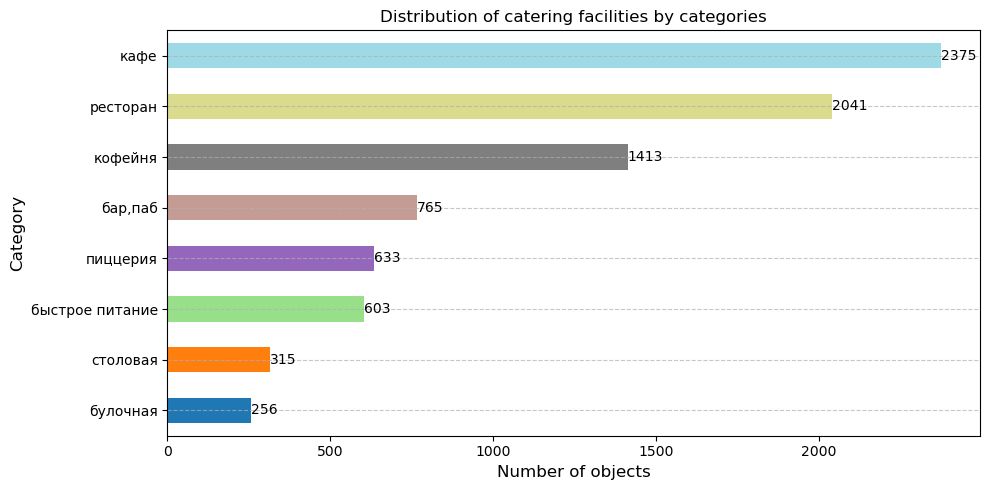

In [22]:
# Group by category and count objects
category_counts = df['category'].value_counts().sort_values(ascending=True)

# Setting up visualization
plt.figure(figsize=(10, 5))

# Generate colors for each column (using the "tab20" colormap)
colors = plt.cm.tab20(np.linspace(0, 1, len(category_counts)))

# Group by category and count objects
graph = category_counts.plot(
    kind='barh',  
    color=colors, 
    legend=False, 
    title="Distribution of catering facilities by categories"
)

plt.xlabel("Number of objects", fontsize=12)
plt.ylabel("Category", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7) 

for i, value in enumerate(category_counts):
    graph.text(value, i, str(value), va='center', fontsize=10) 

plt.tight_layout()  


plt.show()


There are 8 categories of food establishments in the data:
- Bakery
- Cafeteria
- Fast food
- Pizzeria
- Bar, pub
- Coffee shop
- Restaurant
- Cafe

The most common category is `Cafe`, which includes 2,375 establishments. The least common category is `Bakery`, with only 256 establishments.

### Task 2

Let's move on to studying the distribution of establishments across the administrative districts of Moscow, and also examine the distribution of each category of establishment in the Central Administrative District of Moscow.

First, let's take another look at the administrative districts of Moscow present in the data.

In [23]:
df['district'].unique()

['Центральный административный округ', 'Западный административный округ', 'Юго-Западный административный округ', 'Восточный административный округ', 'Юго-Восточный административный округ', 'Северо-Западный административный округ', 'Северо-Восточный административный округ', 'Южный административный округ', 'Северный административный округ']
Categories (9, object): ['Восточный административный округ', 'Западный административный округ', 'Северный административный округ', 'Северо-Восточный административный округ', ..., 'Центральный административный округ', 'Юго-Восточный административный округ', 'Юго-Западный административный округ', 'Южный административный округ']

In [24]:
df['district'] = df['district'].str.replace('административный округ', 'АО')

To study the distribution of the number of establishments by administrative districts of Moscow, we will construct a bar chart

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\2504702620.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=district_counts.index, y=district_counts.values, palette="Set2")


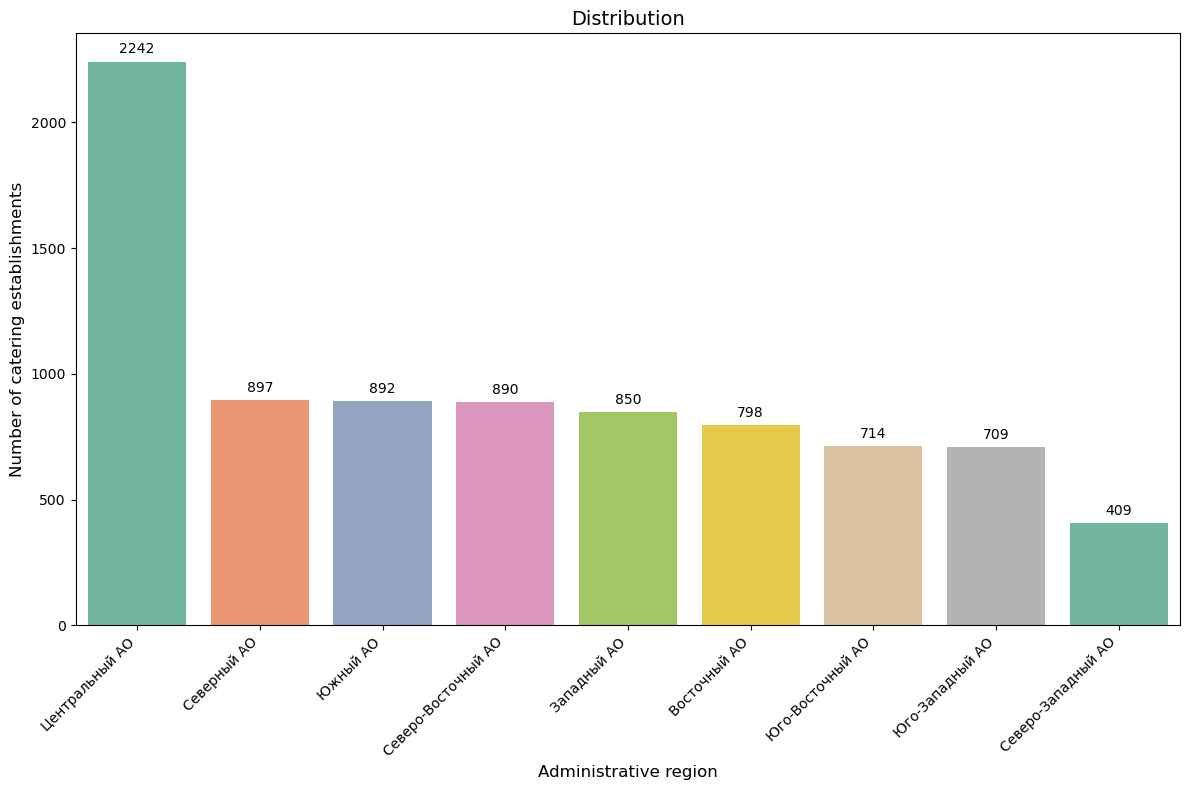

In [25]:
# We group by district and count the number of establishments in each district
district_counts = df['district'].value_counts()

plt.figure(figsize=(12, 8))

sns.barplot(x=district_counts.index, y=district_counts.values, palette="Set2")

for i, value in enumerate(district_counts.values):
    plt.text(i, value + 20, str(value), ha='center', va='bottom', fontsize=10)

plt.xlabel("Administrative region", fontsize=12)
plt.ylabel("Number of catering establishments", fontsize=12)
plt.title("Distribution", fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

We have data on the distribution of food establishments across 9 Administrative Okrugs (AO) of Moscow.
- The highest number of establishments is concentrated in the Central Administrative Okrug (2242 establishments), which is quite logical, as this is the city center with a high concentration of commercial properties.
- The lowest number of establishments is observed in the Northwest Administrative Okrug (409 establishments), which may indicate a lower density of establishments in this area.
- The remaining districts have a relatively even distribution of establishments, with the number of establishments ranging from 798 to 897.

Let's look separately at the distribution of establishments of each category in the Central Administrative District of Moscow.

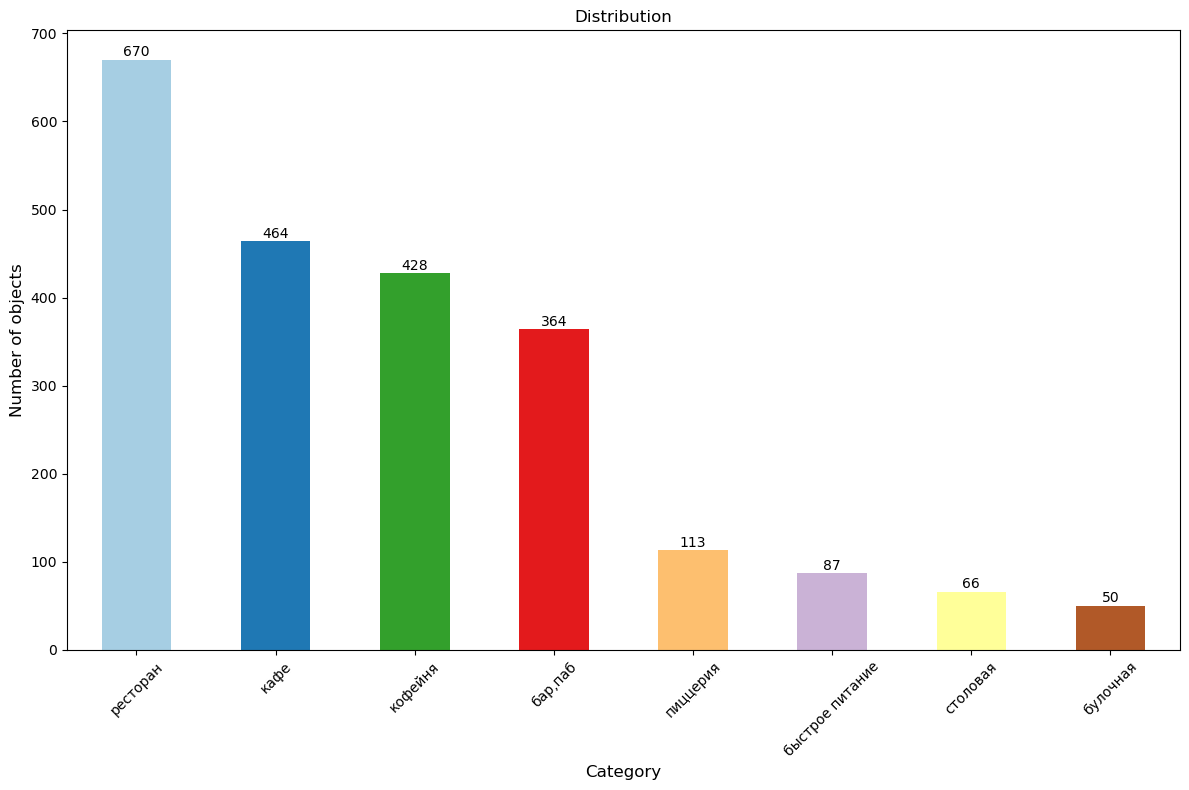

In [26]:
# Filtering and counting the number of establishments by category in the Central AO
category_counts_central = df[df['district'] == 'Центральный АО']['category'].value_counts()

plt.figure(figsize=(12, 8))

colors = plt.cm.Paired(np.linspace(0, 1, len(category_counts_central)))

category_counts_central.plot(
    kind='bar', 
    rot=45, 
    color=colors,
    legend=False,
    title="Distribution"
)

plt.xlabel("Category", fontsize=12)
plt.ylabel("Number of objects", fontsize=12)

for i, value in enumerate(category_counts_central):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontsize=10)

plt.tight_layout() 

plt.show()

We can see that in the `Central AO` of Moscow, restaurants take the lead among establishments, with 670 objects. `Bakeries` are represented in the smallest number (50 establishments), which may reflect lower demand or a more specialized offering.  
Overall, the distribution indicates that higher-class establishments dominate the center of Moscow.

Let's look at the distribution of establishments in the Central Administrative District compared to the whole of Moscow (except for the center):

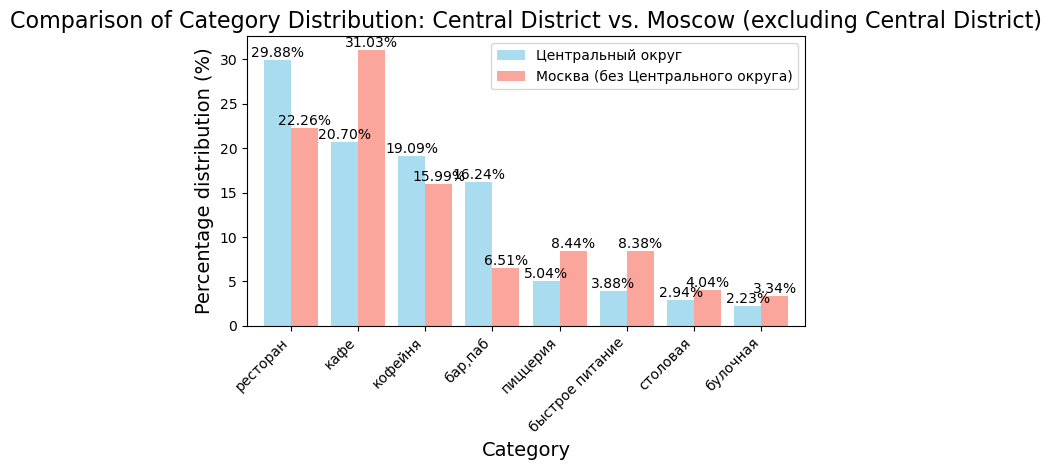

In [27]:
# Filtering data for the Central District
central_district = df[df['district'] == 'Центральный АО']
# Filtering data for all of Moscow, excluding the Central District
non_central_district = df[df['district'] != 'Центральный АО']

# Distribution of categories for the Central District
central_category_dist = central_district['category'].value_counts(normalize=True) * 100

# Distribution of categories for the whole of Moscow (excluding the Central District)
non_central_category_dist = non_central_district['category'].value_counts(normalize=True) * 100

# We combine the distribution of categories for the Central District and all of Moscow
category_dist = pd.DataFrame({
    'Центральный округ': central_category_dist,
    'Москва (без Центрального округа)': non_central_category_dist
})

# Sort columns by Central District values
category_dist = category_dist.loc[central_category_dist.sort_values(ascending=False).index]

# Construction of bar graphs for the Central District and all of Moscow
ax = category_dist.plot(kind='bar', color=['skyblue', 'salmon'], alpha=0.7, width=0.8)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

plt.title('Comparison of Category Distribution: Central District vs. Moscow (excluding Central District)', fontsize=16)
plt.xlabel('Category', fontsize=14)
plt.ylabel('Percentage distribution (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


- The `Central District` has a higher percentage of `restaurants` (29.88% vs. 22.26%) and `cafes` (19.09% vs. 15.99%) compared to other areas of Moscow, which may indicate higher demand for fine dining and high-quality services in the city center.  
- `Bars and pubs` are also more popular in the city center (16.24% vs. 6.51%), confirming its status as the nightlife hub.  
- In other districts of Moscow, the share of `cafes` (31.03% vs. 20.70%), `pizzerias` (8.44% vs. 5.04%), and `fast food` (8.38% vs. 3.88%) is significantly higher, indicating a greater interest in more affordable food formats.  
- `Canteens` (4.04% vs. 2.94%) and `bakeries` (3.34% vs. 2.23%) are also more popular outside the city center, which may be related to a more family-oriented audience and the demand for inexpensive dining options in other parts of the city.

Thus, the `Central District` is focused on more expensive dining formats, while `the rest of Moscow` leans toward more affordable and accessible options.

---

### Task 3
Next, let's explore the ratio of chain and non-chain establishments across all the data.

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\66122411.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chain_plot.set_xticklabels(['Non-chain', 'Chain'])


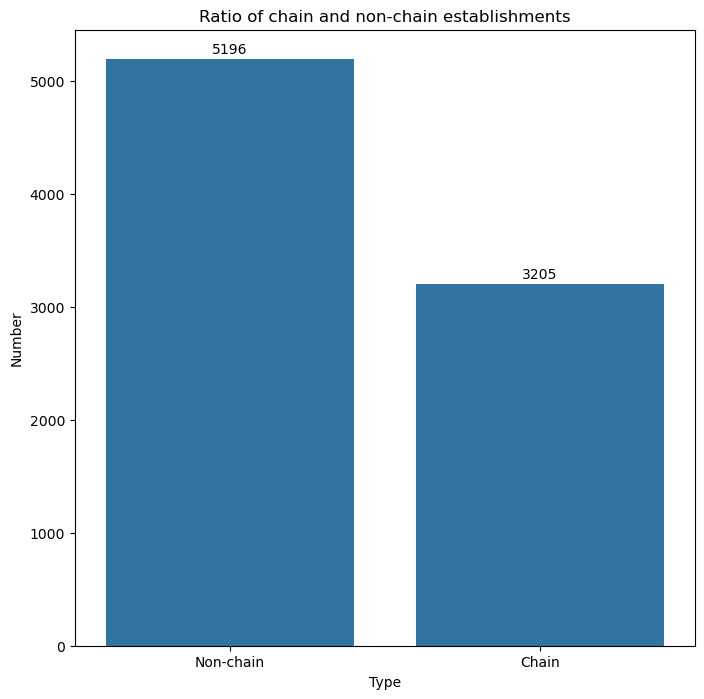

In [28]:
# We count the number of chain and non-chain establishments
chain_counts = df['chain'].value_counts()


plt.figure(figsize=(8, 8))


chain_plot=sns.barplot(x=chain_counts.index, y=chain_counts.values)
plt.title('Ratio of chain and non-chain establishments')
plt.xlabel('Type')
plt.ylabel('Number')

chain_plot.set_xticklabels(['Non-chain', 'Chain'])

for i, value in enumerate(chain_counts.values):
    plt.text(i, value + 20, str(value), ha='center', va='bottom', fontsize=10)


plt.show()

It is clear that there are significantly more non-chain establishments (5196) than chain establishments (3205).

Let's now look at the ratio of chain and non-chain establishments by establishment category.

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\2946772903.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)


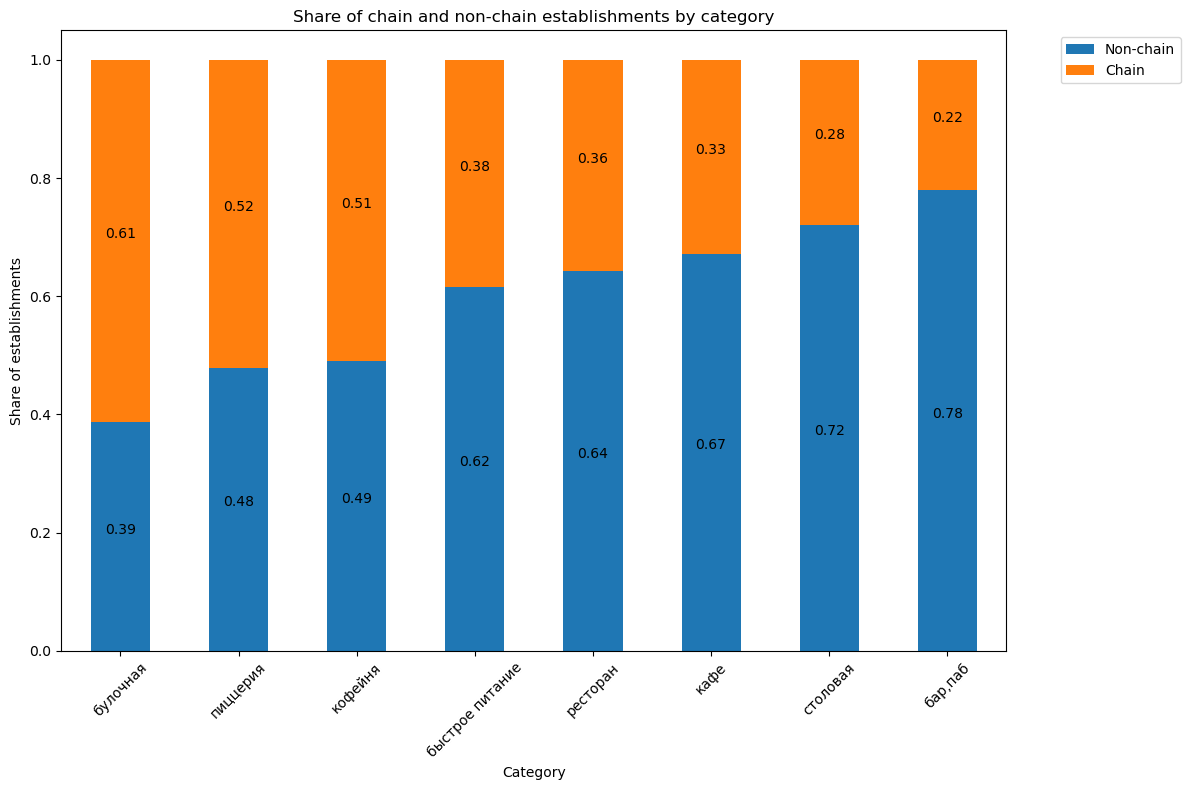

In [29]:
# Group by category and type of establishment (chain/non-chain)
grouped = df.groupby('category')['chain'].value_counts(normalize=True).unstack(fill_value=0)

# Sorted by share of chain establishments
grouped = grouped.sort_values(by=1, ascending=False)

# Visualize with the stacked=True parameter for a stacked chart
cat_chain = grouped.plot(kind='bar', 
                         stacked=True, 
                         title='Share of chain and non-chain establishments by category', 
                         legend=True, 
                         ylabel='Share of establishments',
                         xlabel='Category', 
                         rot=45, 
                         figsize=(12, 8))

handles, labels = cat_chain.get_legend_handles_labels()
labels = ['Non-chain', 'Chain']
cat_chain.legend(handles, labels, bbox_to_anchor=(1.05, 1))

for i, p in enumerate(cat_chain.patches):
    height = p.get_height()
    if height > 0:
        base = p.get_y()
        cat_chain.annotate(f'{height:.2f}', 
                           (p.get_x() + p.get_width() / 2., base + height / 2.), 
                           ha='center', va='center', fontsize=10, color='black', 
                           xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

In most categories of establishments, non-chain establishments dominate. 
- For example, in the categories of `bar, pub`, there are approximately 3.5 times more non-chain establishments than chain ones, and in the `canteen` category, the ratio is about 2.5 to 1. Non-chain `cafes` and `restaurants` are roughly twice as numerous as chain ones. In the `fast food` category, the difference is not as large, but non-chain establishments still outnumber chain ones by about 1.5 times.
- However, in the `bakery` category, chain establishments dominate.
- In the `coffee shop` and `pizzeria` categories, the ratio of chain to non-chain establishments is roughly equal.

---

### Task 4

Let's examine the number of seats in the establishments.

We will start with descriptive statistics for the data.


In [30]:
# Descriptive statistics for number of seats
df['seats'].describe()

count    4792.000000
mean      108.361435
std       122.841072
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

In [31]:
# Check for missing values
total_values = df['seats'].size
missing_values = df['seats'].isnull().sum()
filled_values = total_values - missing_values

print(f"Total number of values in 'seats': {total_values}")
print(f"Number of filled values in 'seats': {filled_values}")
print(f"Number of missing values in 'seats': {missing_values}")

Total number of values in 'seats': 8401
Number of filled values in 'seats': 4792
Number of missing values in 'seats': 3609


What can be highlighted from the provided data:

- The number of missing values is 3609, which constitutes approximately 43% of the total number of values (8401). The missing data is significant and is likely due to randomness and incomplete data. Therefore, further analysis will be based on the available data.

Looking at the distribution of the values, we see that:
- The mean value: 108.36 seats.
- The median (50%): 75 seats. This indicates a right-skewed distribution, suggesting the presence of establishments with a large number of seats.
- The minimum value (min): 0 seats. This likely corresponds to establishments with no seating (e.g., take-out only).
- The maximum value (max): 1288 seats. Given the small number of such establishments, these could be large restaurants.
- The first quartile (25%): 40 seats.
- The third quartile (75%): 140 seats. In other words, most establishments have between 40 and 140 seats.

Anomalies and outliers:
- Values near 0 and close to 1288 could potentially be outliers. Let's investigate them further.

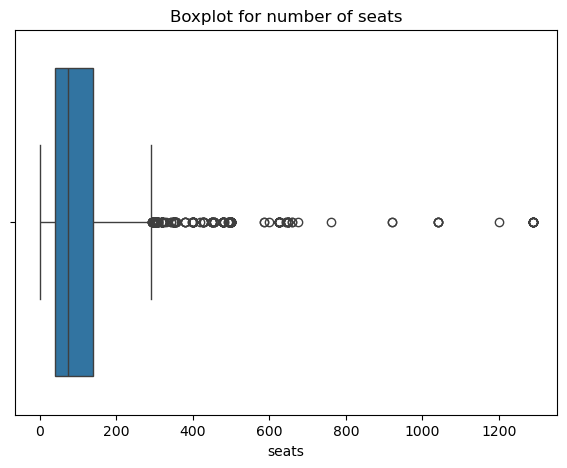

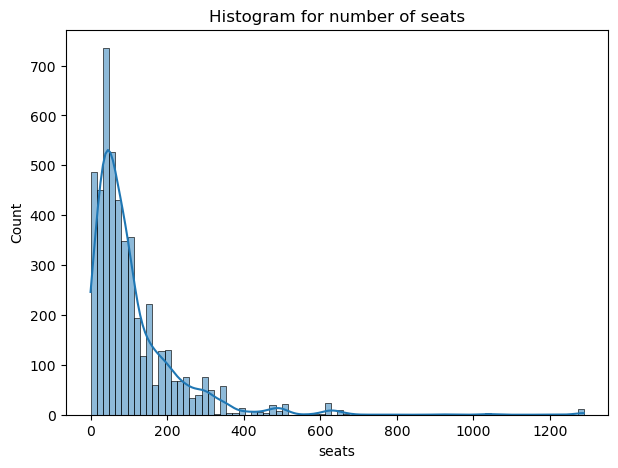

In [32]:
# Boxplot for visualizing emissions
plt.figure(figsize=(7, 5))
sns.boxplot(x=df['seats'])
plt.title('Boxplot for number of seats')
plt.show()

# Histogram to visualize distribution
plt.figure(figsize=(7, 5))
sns.histplot(df['seats'], bins=80, kde=True)
plt.title('Histogram for number of seats')
plt.show()


In [33]:
# Calculate IQR and bounds for seat data
q1 = df['seats'].quantile(0.25)
q3 = df['seats'].quantile(0.75)
iqr = q3 - q1
right_whisker = q3 + 1.5 * iqr
left_whisker = q1 - 1.5 * iqr  

q1, q3, iqr, left_whisker, right_whisker

(40.0, 140.0, 100.0, -110.0, 290.0)

When calculating the left "whisker" a negative value of -110 was obtained, we can replace the obtained negative value with 0, since this is the minimum possible value in the context of the number of seats in the establishments.

In [34]:
left_whisker = max(q1 - 1.5 * iqr, 0)

From the histogram and box plot, we can also see that more than 700 restaurants have around 100 seats. Additionally, there are about 500 establishments without seating, which is likely acceptable, as these establishments may only offer take-out services. The box plot also shows that all establishments with more than 290 seats are visualized as outliers. However, given the available data, a small number of establishments with a large number of seats can occur and may not be an error. Based on this, further analysis will be conducted on the full dataset.

Let's find out what number of seats is typical for each category. In order to reflect the most typical number of seats, in our case, given the presence of outliers in the data, the median will be the optimal choice.

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\343183925.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_seats_by_category = df.groupby('category')['seats'].median().sort_values()


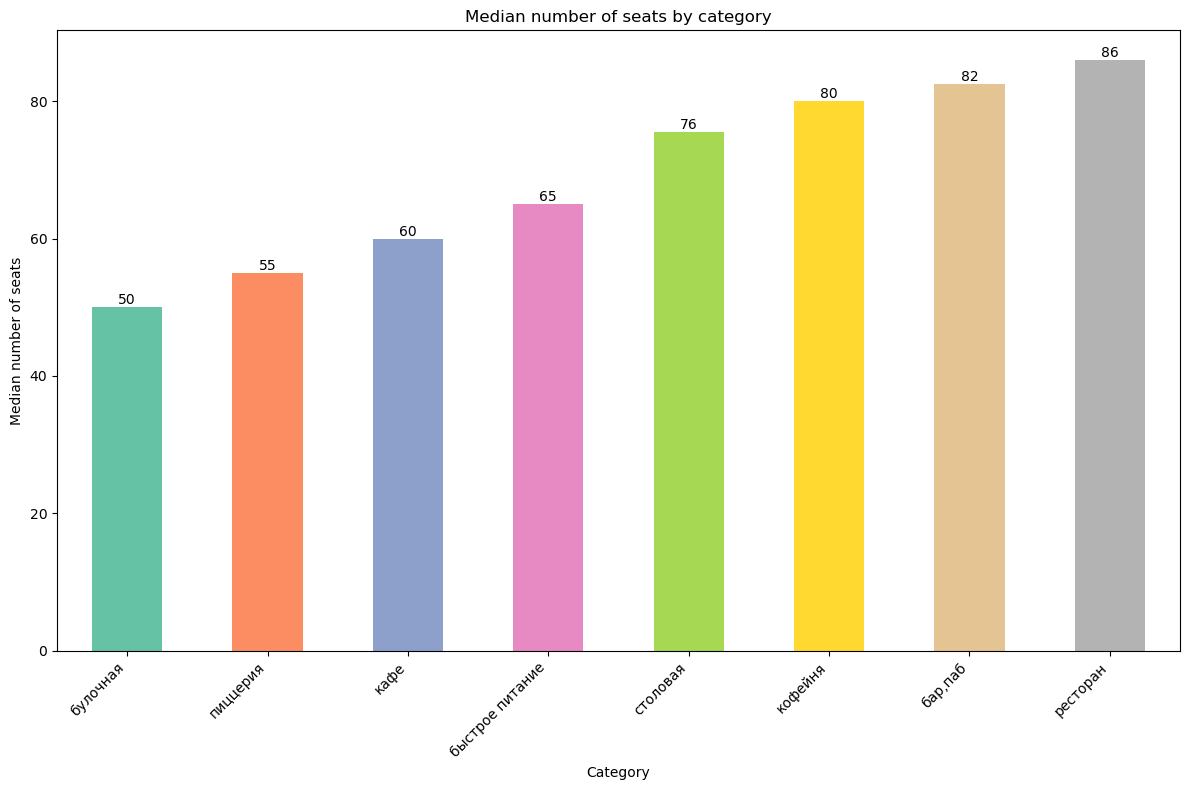

In [35]:
# Let's calculate the median for each type of establishment
median_seats_by_category = df.groupby('category')['seats'].median().sort_values()

plt.figure(figsize=(12, 8))

colors = sns.color_palette("Set2", n_colors=len(median_seats_by_category))

seats_plot = median_seats_by_category.plot(kind='bar', color=colors)
plt.title('Median number of seats by category')
plt.xlabel('Category')
plt.ylabel('Median number of seats')
plt.xticks(rotation=45, ha='right')

for p in seats_plot.patches:
    seats_plot.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


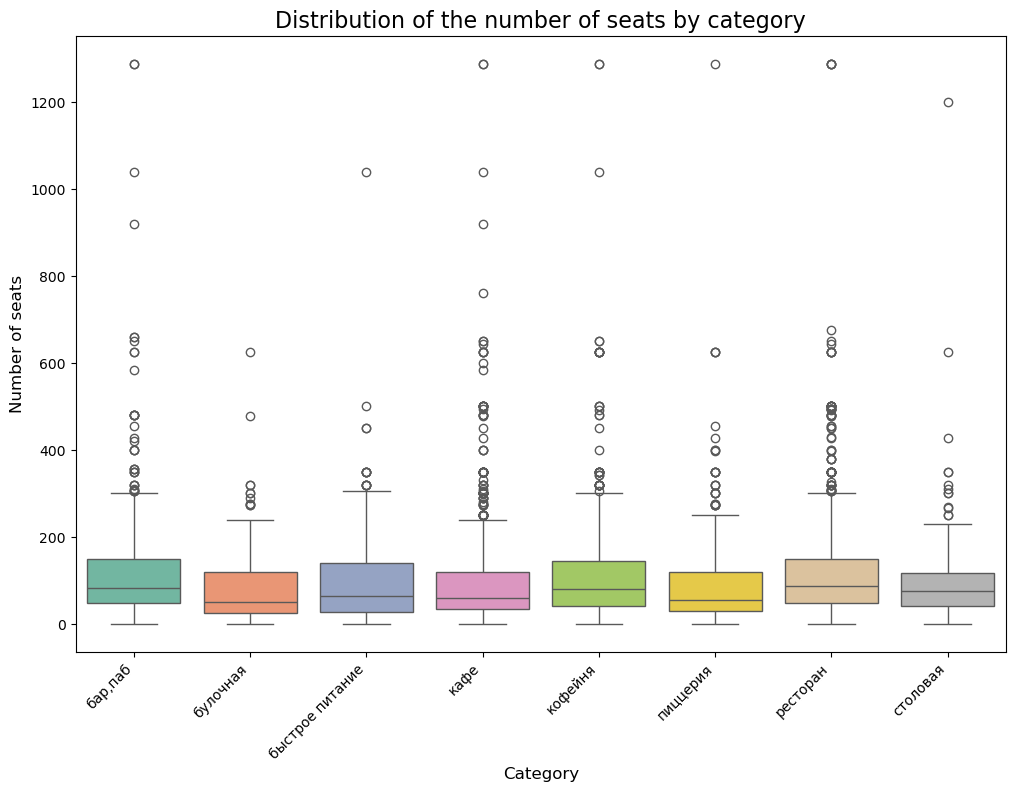

In [36]:
# Create a boxplot for 'seats' by category
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='category', y='seats', hue='category', palette='Set2')

plt.title('Distribution of the number of seats by category', fontsize=16)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Number of seats', fontsize=12)

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.show()


Typical seating capacity for establishment categories ranges from 50 (bakery shops) to 86 (restaurants), reflecting the different concepts and scales of these establishments. In general, the number of seats increases for those categories of establishments that are designed for long-term stays and customer comfort.

In addition, the largest establishments are typical for the city center (92 seats), and the most compact establishments are most common in the Eastern Administrative District (50 seats).

---

### Task 5

We will study the ratings of establishments. To do this, we will study the distribution of average ratings by categories of establishments.

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\270883052.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_rating_by_category = df.groupby('category')['rating'].mean().sort_values()


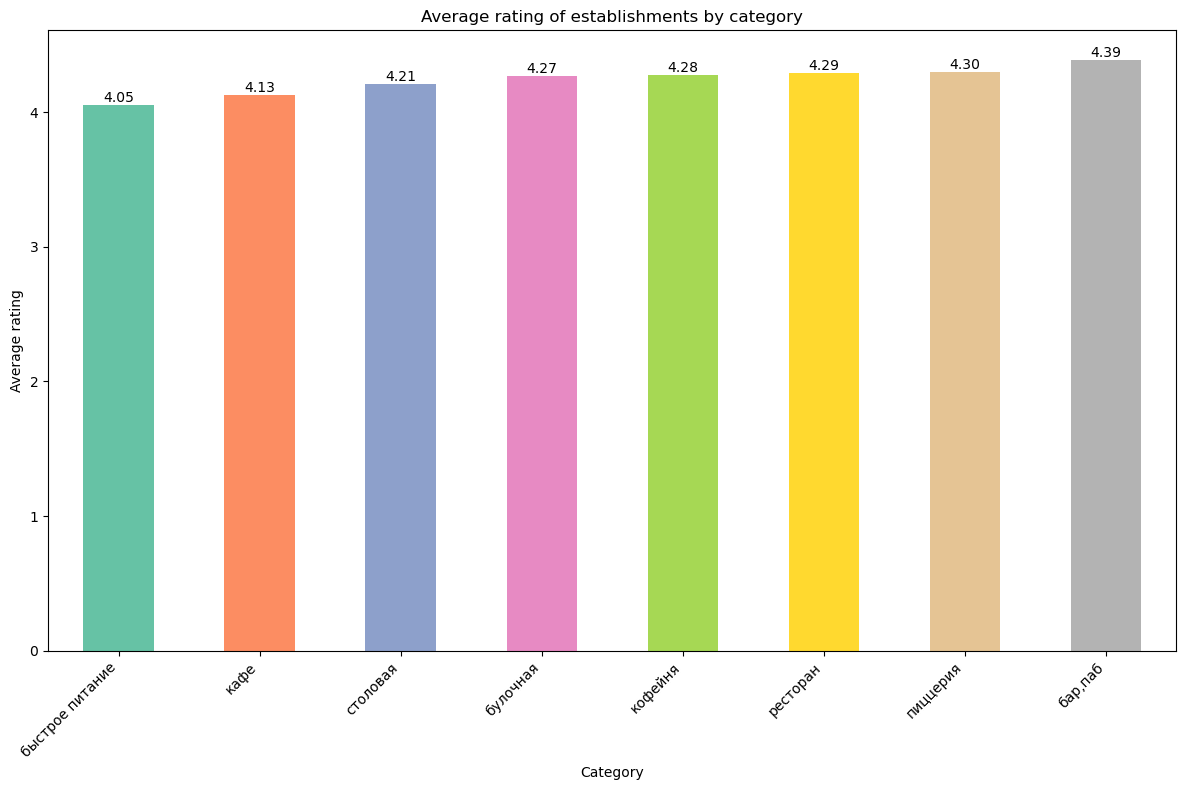

In [37]:
# We will calculate the average rating for each type of establishment
average_rating_by_category = df.groupby('category')['rating'].mean().sort_values()

plt.figure(figsize=(12, 8))

colors = sns.color_palette("Set2", n_colors=len(average_rating_by_category))

rat_plot = average_rating_by_category.plot(kind='bar', color=colors)
plt.title('Average rating of establishments by category')
plt.xlabel('Category')
plt.ylabel('Average rating')
plt.xticks(rotation=45, ha='right')

for p in rat_plot.patches:
    rat_plot.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


Overall, it can be said that the average ratings for all categories of establishments are quite high (from 4.05 to 4.39) and do not differ significantly, indicating a good level of service and quality across all types of public catering. This may also suggest that the catering industry is competitive, where establishments focus on service quality and product offerings. Based on the average ratings by category, we can see the following:

- The `Bar, pub` category has the highest average rating (4.39). This may indicate a high level of service, atmosphere, or other factors that customers enjoy.
- `Pizzeria` and `Restaurant` also received good ratings (4.30 and 4.29, respectively), confirming the high rating of popular establishments with more developed cuisine and service.
- The categories `Café`, `Bakery`, and `Canteen` also have relatively high average ratings, ranging from 4.21 to 4.28, indicating good quality at these establishments, despite the fact that they may not offer as diverse services as larger establishments.
- `Café` and `Fast food` have slightly lower average ratings (4.13 and 4.05, respectively), which may reflect higher customer expectations or less attention to detail and service at these establishments compared to more specialized ones. However, these ratings are still quite good.

---

### Task 6

Let's look at which variables the establishment's rating is most strongly correlated with. To do this, we will examine the relationships between the rating and the following features: category, location, chain status, number of seats, price category, and whether the establishment is open 24/7.

In [38]:
# Define numeric and categorical columns
numerical_columns = ['rating', 'seats'] 
categorical_columns = ['category', 'district', 'chain', 'price', 'is_24_7']

# Set a list of intervals for numeric data
interval_cols = numerical_columns

# Calculate the correlation matrix phi_k
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'seats', 'price', 'is_24_7']].phik_matrix(interval_cols=interval_cols)

print('Correlation matrix with coefficient phi_k for the rating')
correlation_with_rating = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
print(correlation_with_rating)


Correlation matrix with coefficient phi_k for the rating
            rating
price     0.262056
category  0.198615
district  0.189582
is_24_7   0.161354
chain     0.119201
seats     0.000000


It is important to remember that `phi_k` only reports the presence of a relationship between the data. The `phi_k` coefficient does not indicate the nature of the relationship itself, so after receiving the coefficient, the analysis should be continued. But, it can be assumed that an increase in the price category of an establishment is associated with an increase in its rating, since establishments with a high price category can be associated with high quality of service.

Before moving on to further analysis, we visualize the result of the correlation using a heat map and the seaborn library:

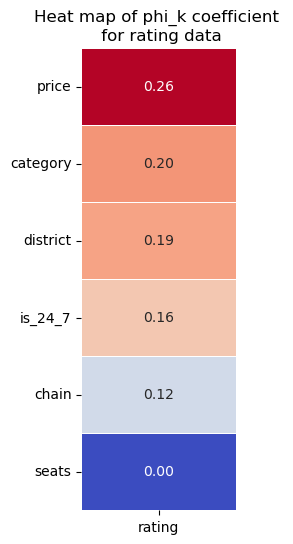

In [39]:
# Building a heat map
plt.figure(figsize=(2, 6))

# Save the correlation matrix of the rating feature with other indicators of the establishment
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5, 
            cbar=False
            )

plt.yticks(rotation=0)


plt.title('Heat map of phi_k coefficient \n for rating data')


plt.show()

The correlation matrix shows that the highest correlation with the establishment rating is the price category with a coefficient of 0.262. Next come the category of establishments and the location area.

- As we have already said, the price category has the strongest connection with the rating, since establishments with a certain price category can be associated with the quality of service, which directly affects the rating.
- The category of the establishment also affects the rating, which may be associated with customer expectations from certain segments.
- The location of the establishment plays a role, since some areas may be more popular, and therefore more competitive for certain types of establishments.
- The 24/7 work feature is also associated with the rating, although weaker (0.16). 24-hour establishments can have both pros and cons, which are reflected in their assessment.
- The chain status of the establishment also weakly correlates with the rating, but in general this indicates that belonging to a chain does not greatly affect the rating of the establishment.
- The number of seats has zero correlation with the rating, which means that the size of the establishment does not affect its rating.

Next, we will study in more detail the relationship between the rating and the price category, since these indicators have the strongest correlation.

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\4197734442.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_rating_by_price = df.groupby('price')['rating'].mean().sort_values(ascending=False)


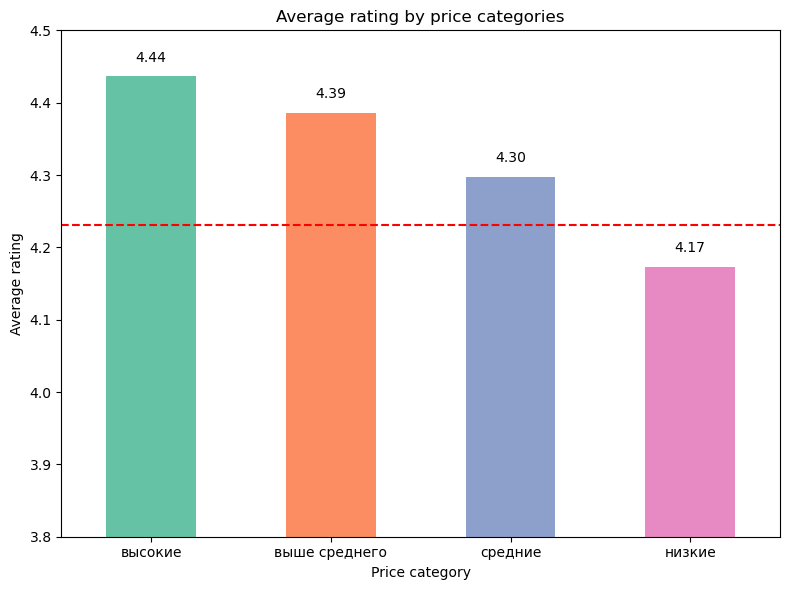

In [40]:
# Grouping by price category and calculating the average rating
mean_rating_by_price = df.groupby('price')['rating'].mean().sort_values(ascending=False)

# Let's build a bar chart
plt.figure(figsize=(8, 6))
colors = sns.color_palette("Set2", len(mean_rating_by_price))
mean_rating_by_price.plot(kind='bar', color=colors)

for i, v in enumerate(mean_rating_by_price):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=10)

plt.title('Average rating by price categories')
plt.xlabel('Price category')
plt.ylabel('Average rating')
plt.xticks(rotation=0)
plt.ylim(3.8, 4.5) 
plt.tight_layout()

overall_mean_rating = df['rating'].mean()
plt.axhline(y=overall_mean_rating, color='red', linestyle='--', linewidth=1.5, label=f'Средний рейтинг ({overall_mean_rating:.2f})')

plt.show()


In [41]:
# Calculate the average rating for all establishments
df['rating'].mean()

4.2302585

As we expected, there is a correlation between the establishment's rating and its price category.

- Establishments with `high prices` have the highest average rating (4.44), which may indicate that customers tend to rate premium establishments highly.
- Establishments `above average` also demonstrate a high rating (4.39), slightly inferior to premium establishments.
- Establishments with `average prices` have an average rating (4.30), which is slightly higher than the overall average (4.23).
- Establishments with `low prices` have the lowest average rating (4.17). Also, the low price category is the only group whose establishments are rated lower than the overall average rating.

The correlation between the price category and the rating can be explained by customers' perception of the establishment: more expensive establishments are more often associated with quality and service level.
Low prices do not always mean a low rating, but their average value is lower, which may indicate higher customer expectations in this category.

---

### Task 7

Let's explore the top 15 most popular chains in Moscow.  
By popularity, we will refer to the number of venues of each chain in the region.  
We will also identify the category to which each chain belongs and calculate the average rating.

In [42]:
# Filtering only chain
chain_restaurants = df.loc[df['chain'] == 1]

# Group by chain name
top_15 = chain_restaurants.groupby(['name'], as_index=False).agg({
    'id': 'count', 
    'category': pd.Series.mode, 
    'rating': 'mean' 
}).sort_values(by='id', ascending=False).head(15)

display(top_15)

,name,id,category,rating
728,шоколадница,120,кофейня,4.177500
335,доминос пицца,76,пиццерия,4.169737
331,додо пицца,74,пиццерия,4.286487
146,one price coffee,71,кофейня,4.064789
741,яндекс лавка,69,ресторан,3.872464
58,cofix,65,кофейня,4.075385
168,prime,50,ресторан,4.116000
664,хинкальная,44,кафе,4.322727
409,кофепорт,42,кофейня,4.147619
418,кулинарная лавка братьев караваевых,39,кафе,4.394872


Let's visualize the data we've obtained. First, let's build a horizontal bar chart with the top 15 chains by number of establishments.

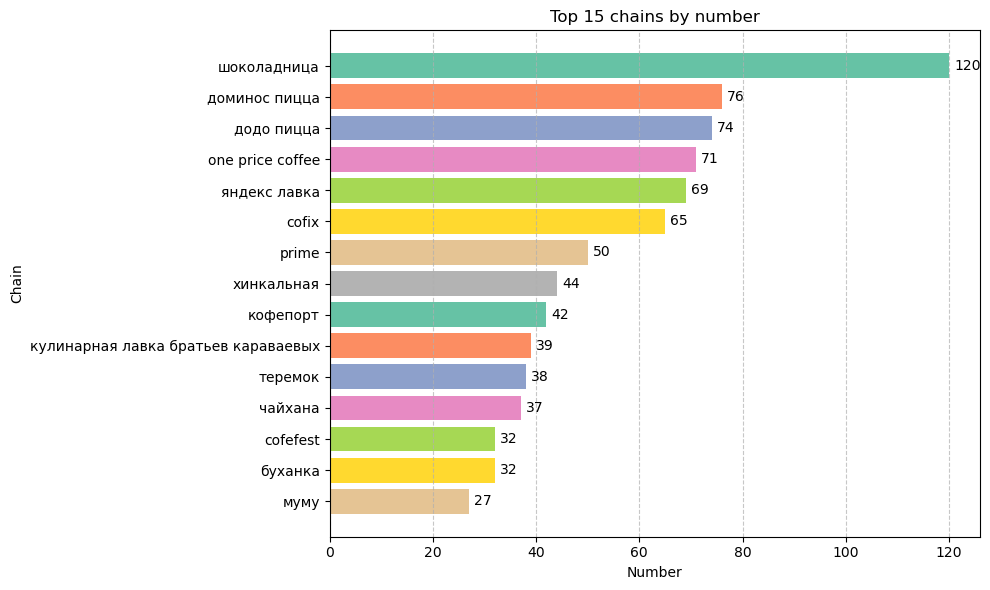

In [43]:
plt.figure(figsize=(10, 6))

colors = sns.color_palette("Set2", n_colors=len(top_15)) 

barh_top_15 = plt.barh(top_15['name'], top_15['id'], color=colors)
plt.xlabel('Number')
plt.ylabel('Chain')
plt.title('Top 15 chains by number')
plt.gca().invert_yaxis() 
plt.grid(axis='x', linestyle='--', alpha=0.7)

for index, value in enumerate(top_15['id']):
    plt.text(value + 1, index, str(value), va='center')

plt.tight_layout()

plt.show()

The top 15 chain venues in Moscow are formed by the following food service networks:

- `Шоколадница` — the leader among chain venues with 120 locations.
- `Доминос Пицца` and `Додо Пицца` — large pizza chains with 76 and 74 venues respectively.
- `One Price Coffee` — a popular coffee shop chain with 71 locations, highlighting the importance of coffee shops in Moscow.
- `Яндекс Лавка` — a network with 69 venues.
- `Cofix` — another coffee shop with 65 locations.
- `Prime` — a network with 50 venues.
- `Хинкальная` — a venue with 44 locations.
- `Кофепорт` — with 42 locations, another coffee shop network.
- `Кулинарная лавка братьев Караваевых` — with 39 venues.
- `Теремок` and `Чайхана` — popular venues with 38 and 37 locations, offering traditional Russian and Eastern cuisine.
- `Cofefest` and `Буханка` — each of which has opened 32 venues.
- `Муму` — completes the top-15 with 27 locations, specializing in Russian cuisine.

It is clear that these chains represent different types of venues and belong to various price categories, but all of them show a high level of popularity.

Let's explore the average rating of each popular chain.

In [44]:
# Calculate the overall average rating for each category
category_avg_rating = df.groupby('category')['rating'].mean().reset_index()
category_avg_rating.rename(columns={'rating': 'category_avg_rating'}, inplace=True)

# Add information about the overall average rating of categories in top_15
top_15_with_category_rating = top_15.merge(category_avg_rating, on='category', how='left').sort_values(by='rating', ascending=False)

display(top_15_with_category_rating)


C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\1209718642.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_avg_rating = df.groupby('category')['rating'].mean().reset_index()


,name,id,category,rating,category_avg_rating
13,буханка,32,булочная,4.396875,4.268359
9,кулинарная лавка братьев караваевых,39,кафе,4.394872,4.125094
7,хинкальная,44,кафе,4.322727,4.125094
2,додо пицца,74,пиццерия,4.286487,4.301264
14,муму,27,кафе,4.229630,4.125094
0,шоколадница,120,кофейня,4.177500,4.277282
1,доминос пицца,76,пиццерия,4.169737,4.301264
8,кофепорт,42,кофейня,4.147619,4.277282
10,теремок,38,ресторан,4.123684,4.290348
6,prime,50,ресторан,4.116000,4.290348


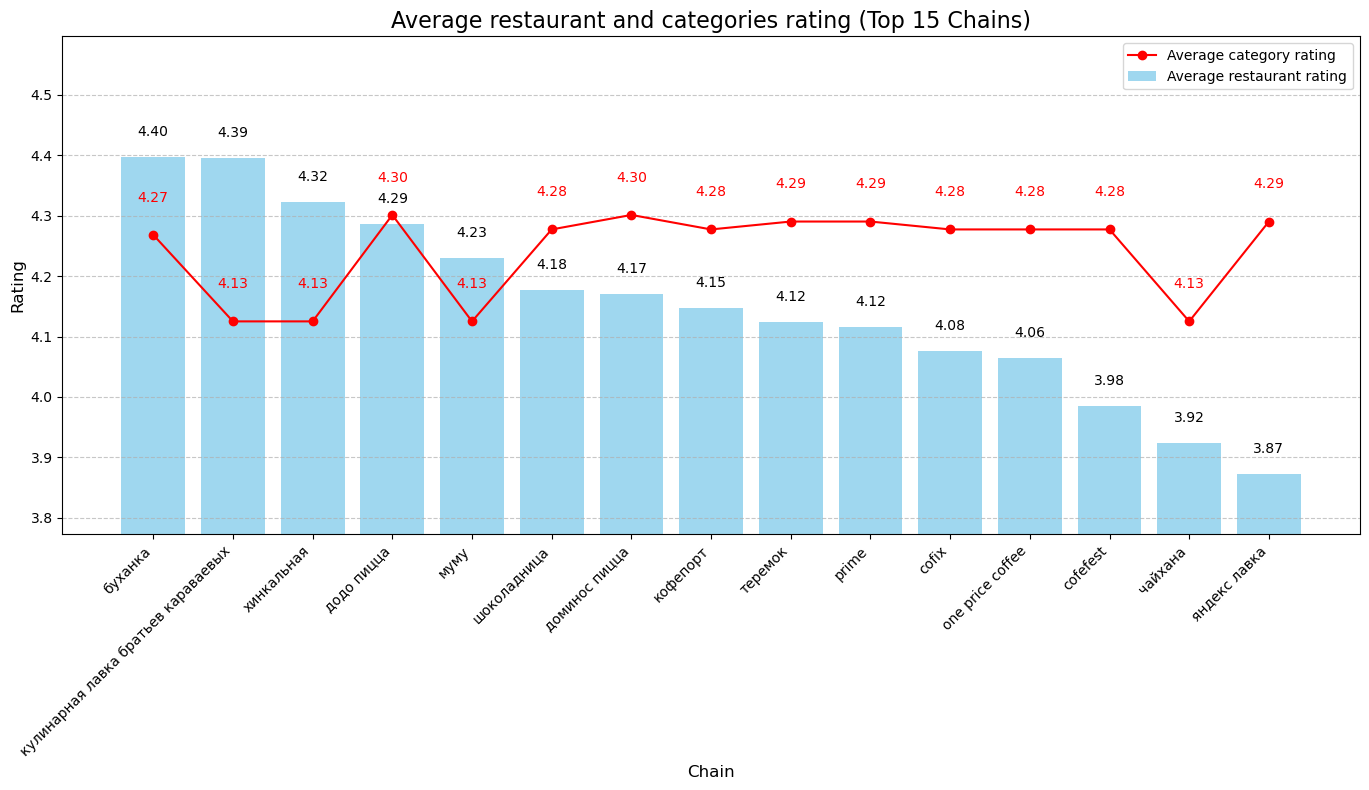

In [45]:
names = top_15_with_category_rating['name']
ratings = top_15_with_category_rating['rating']
category_avg_ratings = top_15_with_category_rating['category_avg_rating']

plt.figure(figsize=(14, 8))

bars = plt.bar(names, ratings, color='skyblue', alpha=0.8, label='Average restaurant rating')

plt.plot(names, category_avg_ratings, color='red', marker='o', label='Average category rating')

for bar, rating in zip(bars, ratings):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.03, f'{rating:.2f}', 
             ha='center', va='bottom', fontsize=10)

for i, category_rating in enumerate(category_avg_ratings):
    plt.text(i, category_rating + 0.05, f'{category_rating:.2f}', 
             ha='center', va='bottom', fontsize=10, color='red')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Chain', fontsize=12)
plt.ylabel('Rating', fontsize=12)
plt.title('Average restaurant and categories rating (Top 15 Chains)', fontsize=16)
plt.ylim(ratings.min() - 0.1, ratings.max() + 0.2)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [46]:
# Overall average rating for top 15 chain
top_15_avg_rate = top_15['rating'].mean()

# Выводим результат с поясняющим текстом
print(f"Average rating for top 15 chain: {top_15_avg_rate:.2f}")


Average rating for top 15 chain: 4.15


Based on the ratings data for the venues, we can observe the following:

- The bakery `Буханка` has the highest rating among all venues (4.40), which is also above the average rating for the `Bakery` category (4.27). This indicates a high quality of the chain compared to its counterparts.
- `Кулинарная лавка братьев Караваевых` and `Хинкальная` stand out with their high ratings (4.39 and 4.32 respectively), surpassing the average rating for the `Cafe` category (4.12). Both chains may be leaders in their category in terms of quality.
- `Чайхана` (3.92) and `Яндекс Лавка` (3.87) have the lowest ratings among the top-15 venues, with their ratings significantly below the average for their categories (`Cafe` – 4.12 and `Restaurant` – 4.29 respectively). This may indicate some quality issues or customer dissatisfaction.
- `Доминос Пицца` (4.17) and `Додо Пицца` (4.29) have ratings close to the average for the `Pizzeria` category (4.30), which speaks to their stability but also suggests they do not stand out among competitors.

It is important to emphasize that nearly all chain venues in the top-15 have good and closely aligned ratings, ranging from 4.12 to 4.40. The average rating for the top-15 chain venues is 4.15. This indicates that regardless of the size of the chain, they strive to maintain consistently high service quality.

Let's look at how the categories of these chain venues are distributed.

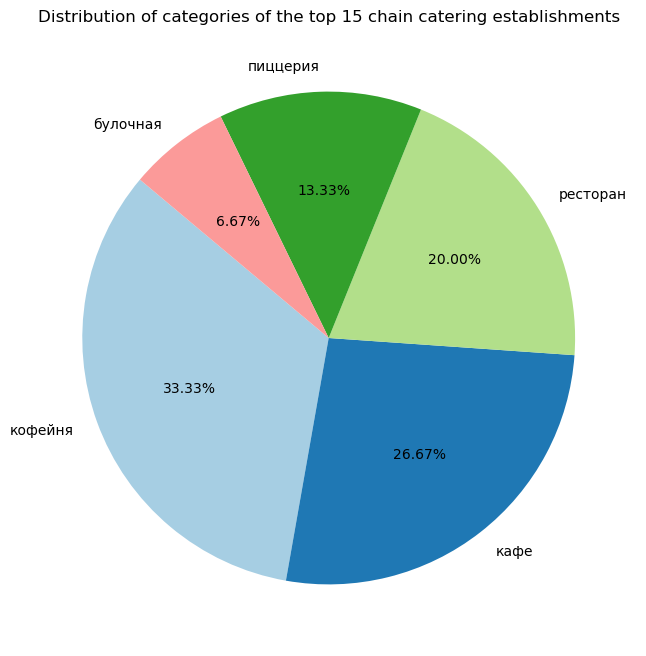

In [47]:
# Distribution by categories
category_counts = top_15['category'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%0.2f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of categories of the top 15 chain catering establishments')
plt.show()


- `Coffee shops` make up the largest share among the categories in your top-15 venues (about 1/3 of all venues — 33.33%).
- `Cafes` come next, accounting for just over 1/4 of all venues — 26.67%.
- `Restaurants` are in fifth place, but still represent a significant share — 20%.
- `Pizzerias` take up a slightly smaller, but still noticeable portion, accounting for 13.33%.
- `Bakeries` have the smallest share among all categories — 6.67%.

Thus, after analyzing the top-15 chain venues, we can conclude that:
- Coffee shop chains dominate in the number of venues, but cafes and pizzerias compete in terms of popularity and quality.
- High ratings indicate the high quality of most of the presented chains, making them attractive to customers.
- Among all chains, the cafe "Кулинарная лавка братьев Караваевых" and the bakery "Буханка" have the highest customer ratings.

---

### Task 8

Let's explore the variation of the average bill (`middle_avg_bill`) for venues based on different districts of Moscow.  
To start, let's look at the descriptive statistics for the average bill in venues across each administrative district of Moscow.

In [48]:
# 1. Key indicators for all districts
df.groupby('district')['middle_avg_bill'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Центральный АО,1060.0,1191.057495,920.014893,0.0,500.00,1000.0,1500.0,7250.0
Западный АО,306.0,1053.225464,779.008484,50.0,427.50,1000.0,1500.0,5250.0
Северный АО,322.0,927.959656,912.609375,130.0,350.00,650.0,1250.0,11000.0
Южный АО,314.0,834.398071,2008.639404,100.0,350.00,500.0,1037.5,35000.0
Северо-Западный АО,157.0,822.222900,595.055176,120.0,340.00,700.0,1100.0,2900.0
Восточный АО,260.0,820.626953,850.903442,50.0,338.00,575.0,1100.0,10000.0
Юго-Западный АО,235.0,792.561707,559.173035,100.0,350.00,600.0,1100.0,2750.0
Северо-Восточный АО,301.0,716.611267,591.232239,50.0,325.00,500.0,950.0,4500.0
Юго-Восточный АО,194.0,654.097961,566.825745,30.0,281.25,450.0,887.5,3750.0


From the descriptive statistics, we can see that most venues are concentrated in the Central District (CAO), which is quite logical due to higher demand and competition.

- The Central District also stands out with high average and median bills, as it is the central part of Moscow with a high concentration of expensive venues. The maximum bill is 7250 rubles, which cannot be considered an extreme outlier for this district. The standard deviation of 920.01 rubles indicates a wide price range, which is also expected due to the variety of venues (from budget to premium) in the city center. There are also venues with an average bill of 0 rubles, which is most likely a data error.
- The Western District takes second place in terms of prices and is only slightly different from the Central district (the median price in both locations is the same, and the average in the Western district is only 138 rubles lower). This indicates the prestige of the district. Thus, the Western District shows a similar price level to the Central District, but with a smaller price variation.

Other districts show significantly lower prices in venues, especially in the median.

- In the Northern District, prices are lower than in the CAO and WAO (the average bill is 927.96 rubles), but the variation is high due to some expensive venues that could potentially be outliers (maximum average bill of 11000 rubles).
- In the Southern District, prices are noticeably lower (average bill 834.39 rubles), with extreme outliers, the highest being an average bill of 35000 rubles, which is likely an outlier.
- In the Northwestern District, the average bill is also lower compared to the CAO and WAO (average bill 822.22 rubles), but without strong outliers.
- In the Eastern District, there is a wide range of prices, but most venues are cheaper than in the central part of Moscow (average bill 820.62 rubles). There are also extremely high average bills (10000 rubles).
- In the Southwestern District, prices are generally lower than in the CAO, with no significant outliers (average bill 792.56 rubles).
- The Northeastern District is one of the districts with the lowest prices (average bill 716.61 rubles).
- The Southeastern District has the lowest prices (average bill 654.09 rubles), indicating greater accessibility of venues.

Given the large number of outliers, before visualizing the average bill by district of Moscow, it would be useful to create boxplots for a clearer representation of the average bill values across different districts.

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\3707076217.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


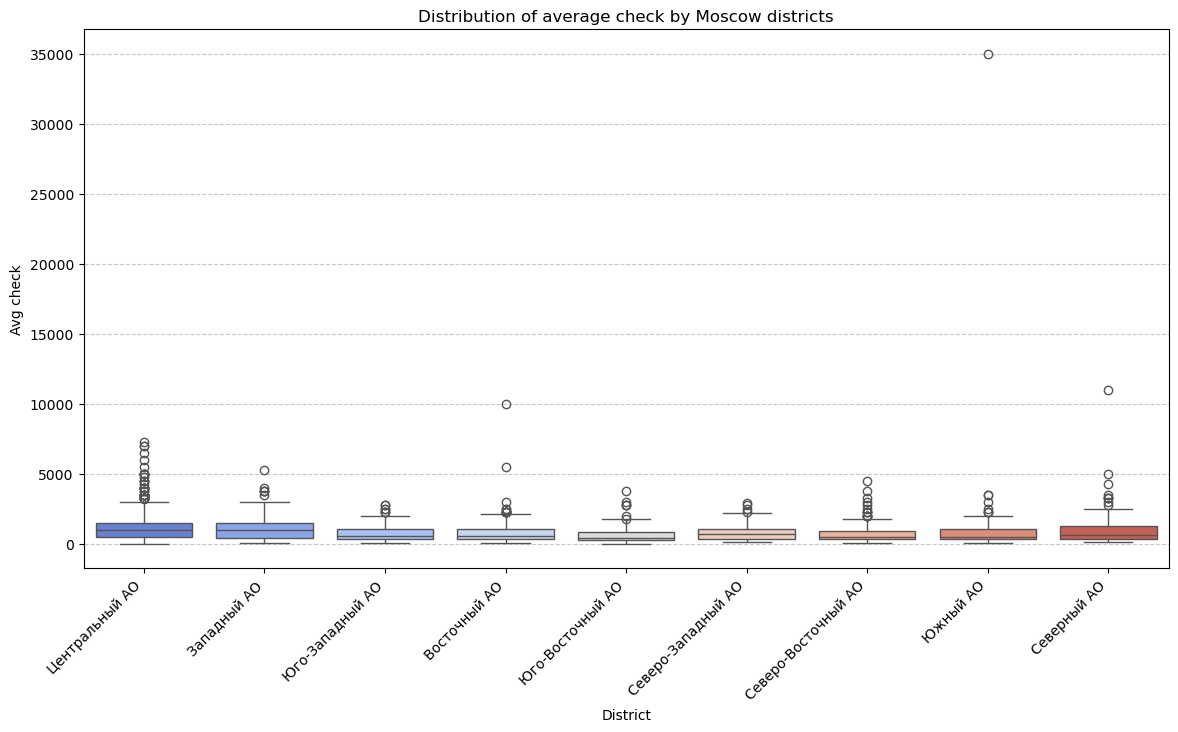

In [49]:
#Boxplot for average check distribution
plt.figure(figsize=(14, 7))
sns.boxplot(
    x='district',
    y='middle_avg_bill',
    data=df,
    palette='coolwarm'
)
plt.xticks(rotation=45, ha='right')
plt.xlabel('District')
plt.ylabel('Avg check')
plt.title('Distribution of average check by Moscow districts')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The chart clearly shows that in the Eastern, Southern, and Northern Districts, there are extremely high values for the average bill (10000 rubles, 35000 rubles, and 11000 rubles, respectively). Given that these values are much higher than the maximum average bill in the Central District, I would remove these values from further analysis, as this will provide a more realistic representation of the average bill in these districts. Additionally, we will exclude the average bill of 0, as it is most likely a system error.

Considering these decisions for data optimization, let's build a new descriptive statistics summary and visualize the distribution of the average bill across the districts of Moscow.

In [50]:
# Filter the data: the average check must be greater than 0 and less than 10,000 rubles
df_filtered = df[(df['middle_avg_bill'] > 0) & (df['middle_avg_bill'] < 10000)]

# Recalculating descriptive statistics by districts
df_filtered.groupby('district')['middle_avg_bill'].describe().sort_values(by='mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
district,,,,,,,,
Центральный АО,1059.0,1192.182251,919.719604,67.0,500.00,1000.0,1500.0,7250.0
Западный АО,306.0,1053.225464,779.008484,50.0,427.50,1000.0,1500.0,5250.0
Северный АО,321.0,896.582581,719.341125,130.0,350.00,650.0,1250.0,5000.0
Северо-Западный АО,157.0,822.222900,595.055176,120.0,340.00,700.0,1100.0,2900.0
Юго-Западный АО,235.0,792.561707,559.173035,100.0,350.00,600.0,1100.0,2750.0
Восточный АО,259.0,785.185303,631.655823,50.0,337.00,550.0,1080.0,5500.0
Южный АО,313.0,725.242798,542.500610,100.0,350.00,500.0,1000.0,3500.0
Северо-Восточный АО,301.0,716.611267,591.232239,50.0,325.00,500.0,950.0,4500.0
Юго-Восточный АО,194.0,654.097961,566.825745,30.0,281.25,450.0,887.5,3750.0


After the filtering, the distribution of districts by average bill has slightly changed.

- The Central District and the Western District remain the leaders in terms of average bill.
- The Northern District remains in third place, with prices significantly differing from the CAO and WAO.
- Further changes occurred in the distribution of districts by average bill. After the Northern District, we have the Northwestern District, Southwestern District, Eastern District, and Southern District, where the average bill varies from 822.22 to 725.24 rubles. Also, the Southern District now has a more even distribution with a maximum bill of 3500 rubles (instead of 35000 rubles, which further confirms that this amount was likely due to a typographical error with an extra zero).
- The Northeastern District and Southeastern District remain the cheapest, with average bills of 716.61 rubles and 654.09 rubles, respectively.

Let's visualize the distribution of the average bill of venues across the districts of Moscow for better clarity.

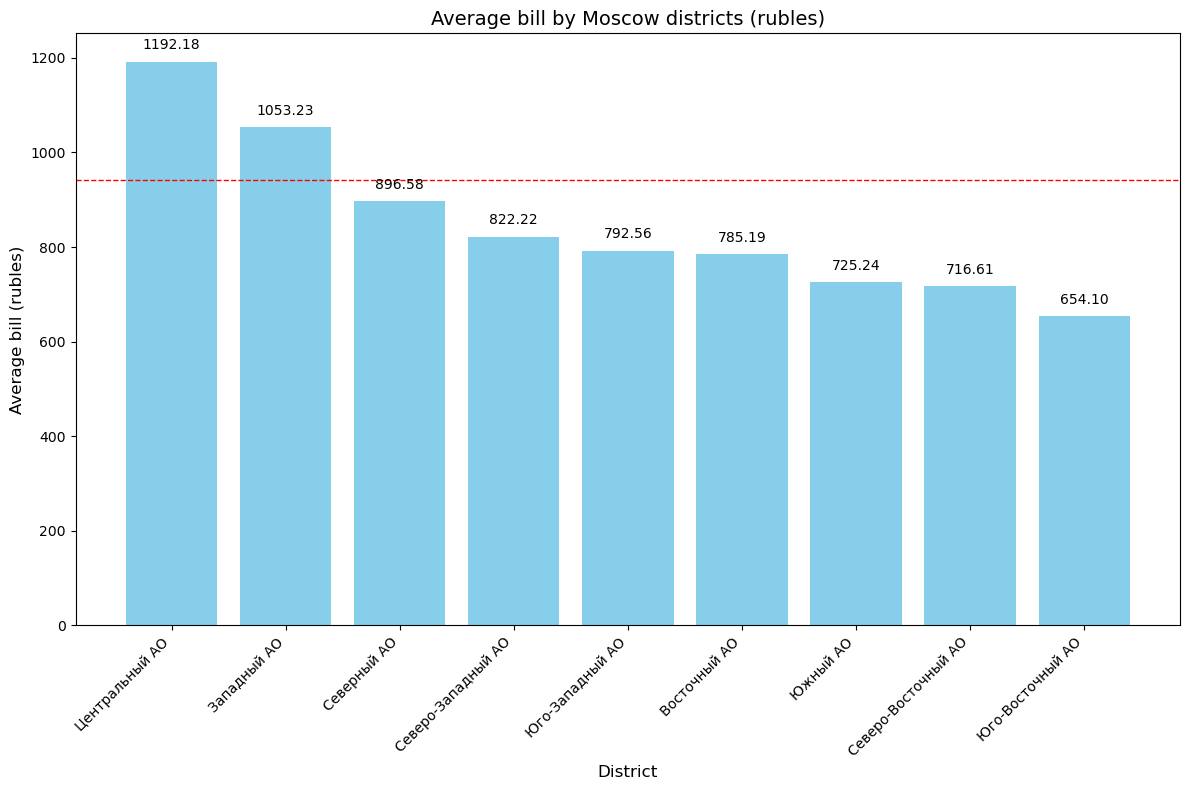

In [51]:
# We calculate the average check by district and the overall average check
district_avg_bill = df_filtered.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False)
overall_mean = df_filtered['middle_avg_bill'].mean()


plt.figure(figsize=(12, 8))
bars = plt.bar(district_avg_bill.index, district_avg_bill.values, color='skyblue')

# Let's add a horizontal line of the overall average check
plt.axhline(y=overall_mean, color='red', linestyle='--', linewidth=1, label=f'Overall average bill ({overall_mean:.2f} rubles)')

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 20, f'{bar.get_height():.2f}',
             ha='center', va='bottom', fontsize=10)

plt.title('Average bill by Moscow districts (rubles)', fontsize=14)
plt.xlabel('District', fontsize=12)
plt.ylabel('Average bill (rubles)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

In [52]:
# Calculating the average bill for Moscow
df_filtered['middle_avg_bill'].mean()

941.4661

From the chart, it is clear that the average bill in the Central and Western Districts is higher than in other districts of Moscow, as well as higher than the average bill across Moscow in general.

Thus, it can indeed be said that the Central District has the highest average bill in dining establishments (1192.18 rubles). In other districts of Moscow, the average bill is lower than in the center. However, the Western District is not far behind the center, with the average bill in its venues also higher (1053.23 rubles) than the general average across Moscow (941.47 rubles).

The lowest average bill is characteristic of venues in the Southeastern District (only 654.1 rubles).

---

### Task 9

We will also take a closer look at the differences between food establishments that operate 24/7 and those that do not. This is an important parameter, which may be interrelated with indicators such as location, rating, average bill, and whether the establishment is part of a chain or not.

- Food establishments that operate 24/7 are focused on providing maximum convenience for customers, as they offer services regardless of the time of day. This may be particularly relevant in districts with active nightlife, large tourist flows, or transport hubs, so it can be assumed that such establishments could be popular in the center of Moscow.
- Additionally, 24/7 operation is a marketing advantage for chain establishments, which focus on mass availability (e.g., 24-hour cafes, bakeries, or fast food outlets).
- Operating 24/7 is a sign of a business adapting to the lifestyle of consumers, especially in large cities. It’s possible that certain categories of establishments (such as bars, snack bars, or cafes) gain more benefits from round-the-clock operation than others (such as restaurants or canteens).
- Food establishments that operate 24/7 have more opportunities to increase the number of customers, which could potentially impact the increase in the average bill.
- Furthermore, operating 24/7 can affect the establishment’s rating, as this mode of operation requires higher costs for staff, equipment, and service maintenance. This could affect the establishment’s rating both positively (availability) and negatively (staff overload, lower service quality during nighttime).

Let's begin by looking at the correlation between the operating mode and the above-mentioned parameters.

Correlation matrix with coefficient phi_k for variable is_24_7


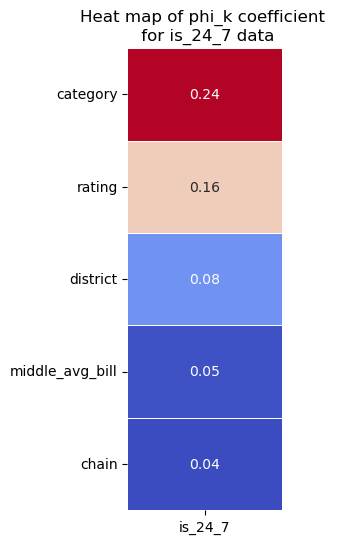

In [53]:
# Define numeric and categorical columns
numerical_columns = ['rating', 'middle_avg_bill']
categorical_columns = ['category', 'district', 'chain', 'is_24_7']

# Set a list of intervals for numeric data
interval_cols = numerical_columns

# Calculate the correlation matrix phi_k
correlation_matrix = df[['rating', 'category', 'district', 'chain', 'middle_avg_bill', 'is_24_7']].phik_matrix(interval_cols=interval_cols)

# We derive a correlation with the opening hours
print('Correlation matrix with coefficient phi_k for variable is_24_7')
correlation_with_hours = correlation_matrix.loc[correlation_matrix.index != 'is_24_7'][['is_24_7']].sort_values(by='is_24_7', ascending=False)

plt.figure(figsize=(2, 6))

sns.heatmap(correlation_with_hours,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            linewidths=0.5, 
            cbar=False
            )

plt.yticks(rotation=0)


plt.title('Heat map of phi_k coefficient \n for is_24_7 data')

plt.show()


- The food establishment category shows the strongest correlation with 24/7 operation (0.24). Indeed, certain types of food establishments (e.g., fast food or cafes) are more likely to operate 24/7 compared to others like bakeries or coffee shops. It’s worth investigating which categories lead in the share of 24/7 establishments.
- The rating also shows a moderate correlation with 24/7 operation (0.16). It’s possible that 24/7 establishments receive either higher or lower ratings, depending on the service provided. This relationship should also be examined.
- Location, average bill, and whether the establishment is part of a chain seem to have little to no correlation with whether a food establishment operates 24/7.

Given the correlation metrics, let's take a closer look at the relationship between 24/7 operation, food establishment categories, and ratings. First, let's see which categories of food establishments most frequently operate around the clock.

C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\819471065.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  type_24_7 = df.groupby('category')['is_24_7'].mean().sort_values(ascending=False) * 100


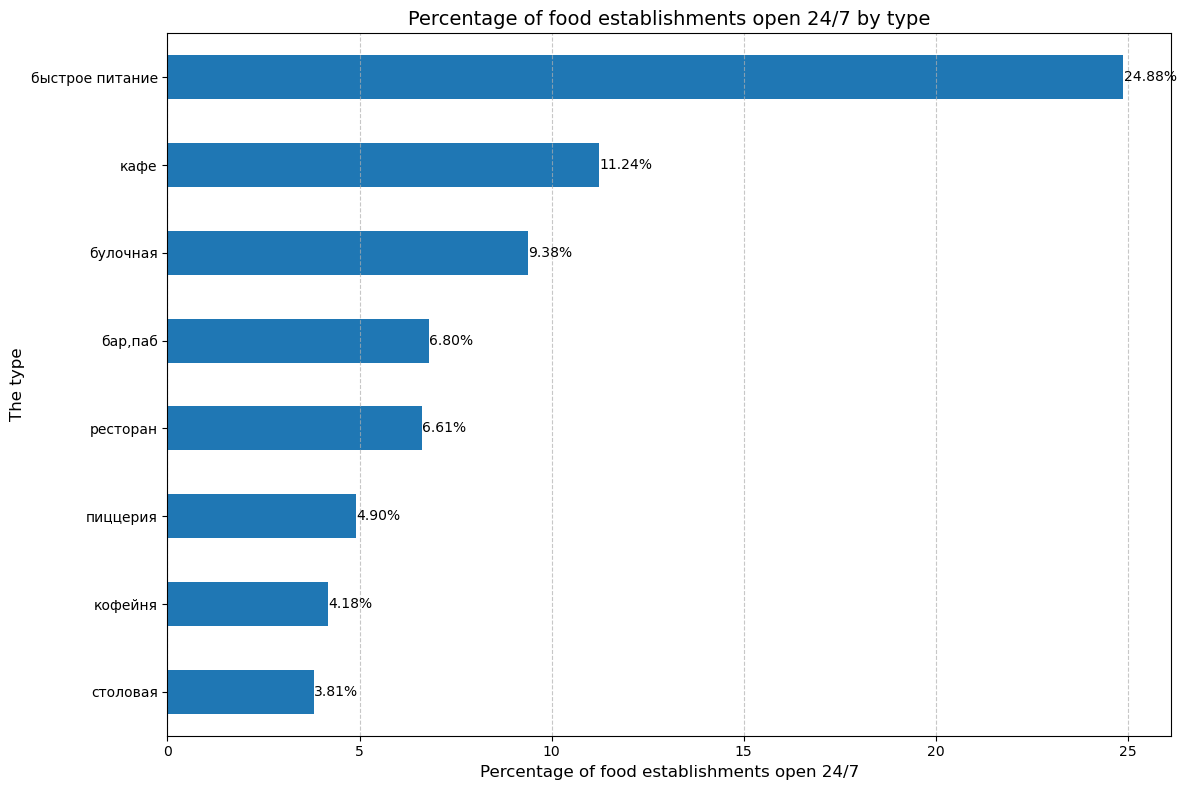

In [54]:
# Percentage of food establishments open 24/7 by type
type_24_7 = df.groupby('category')['is_24_7'].mean().sort_values(ascending=False) * 100


plt.figure(figsize=(12, 8))
bars = type_24_7.sort_values().plot(kind='barh')


for bar in bars.patches:
    plt.text(bar.get_width() + 0.01,  
             bar.get_y() + bar.get_height() / 2,  
             f'{bar.get_width():.2f}%',  
             va='center',  
             fontsize=10,  
             color='black')  

plt.title('Percentage of food establishments open 24/7 by type', fontsize=14)
plt.xlabel('Percentage of food establishments open 24/7', fontsize=12)
plt.ylabel('The type', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- It is evident that the "fast food" category stands out significantly among other types of establishments in terms of the number of 24/7 locations (almost 25%). Apparently, they follow the concept of availability at any time of the day or night.
- The "cafes" category takes second place, but the gap with "fast food" is notable (11.24%). Some cafes may also focus on customer convenience during evening and night hours.
- The "bakeries" category also has a moderate percentage of 24/7 establishments (9.38%). This may be due to the need for early baking.
- In the "bars and pubs" category, only 6.80% of establishments operate 24/7, likely due to their greater popularity in the evening and night hours rather than in the morning or afternoon.
- The "restaurants" category has 6.61% of 24/7 establishments, as restaurants are often focused on specific meal times, which is why the share of those operating 24/7 is lower.
- "Pizzerias" (4.90%)—despite the popularity of pizza delivery in the evening, there are few pizzerias open 24/7.
- The low percentage (4.18%) of 24/7 establishments in the "coffee shops" category is related to the fact that coffee shops often focus on daytime and morning/afternoon customer traffic.
- "Canteens" have the lowest percentage among all categories (3.81%). Canteens are typically tied to standard working hours and do not require a 24/7 format.

Теперь посмотрим как же все-таки работа заведений 24.7 связана с их рейтингом.

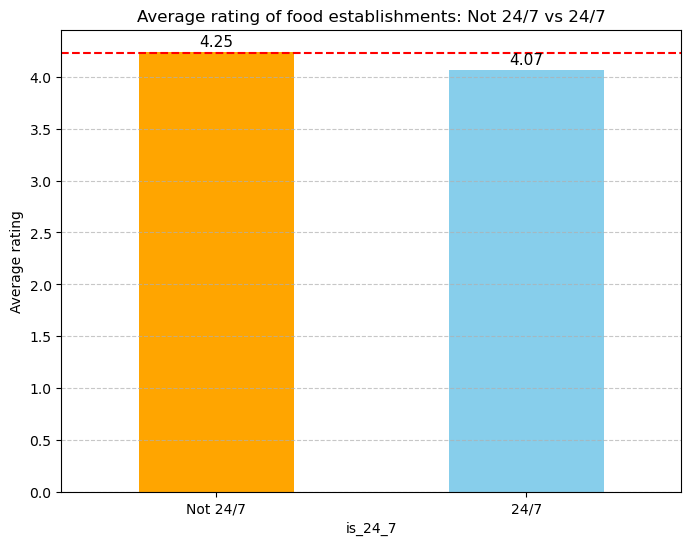

In [55]:
# Calculate the average rating for 24/7 and non-24/7 food establishments
rating_comparison = df.groupby('is_24_7')['rating'].mean()

plt.figure(figsize=(8, 6))
rating_comparison.plot(kind='bar', color=['orange', 'skyblue'])
plt.title('Average rating of food establishments: Not 24/7 vs 24/7')
plt.ylabel('Average rating')
plt.xticks(ticks=[0, 1], labels=['Not 24/7', '24/7'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, value in enumerate(rating_comparison):
    plt.text(i, value + 0.05, f'{value:.2f}', ha='center', fontsize=11)
    
# Calculate the average rating for all food establishments
overall_avg_rating = df['rating'].mean()

# Add a line for the average rating of all food establishments
plt.axhline(y=overall_avg_rating, color='red', linestyle='--', label=f'Avg rating of all: {overall_avg_rating:.2f}')

plt.show()


In [56]:
average_rating = df['rating'].mean()
print(f"The average rating for all food establishments is: {average_rating:.2f}")


The average rating for all food establishments is: 4.23


The rating of food establishments operating 24/7 turned out to be slightly lower than that of those that do not operate around the clock. The average rating for establishments working 24/7 is 4.07, while for others it is 4.25, which may suggest that 24/7 establishments may have slightly lower service or food quality.

The average rating across all establishments is 4.23, which confirms that 24/7 establishments are slightly below the overall average.

Thus, 24/7 establishments are primarily fast food places, which may be related to the high demand for round-the-clock service in this category. As for the quality, 24/7 establishments have a somewhat lower average rating compared to other establishments. This could indicate lower service quality or specific demand characteristics during night hours.

In [57]:
# Average rating for 24/7 categories
avg_rating_24_7 = df[df['is_24_7']].groupby('category')['rating'].mean()

# Average rating for all food establishments in each category
avg_rating_all = df.groupby('category')['rating'].mean()

# Comparison
rating_comparison = pd.DataFrame({
    '24_7_avg_rating': avg_rating_24_7,
    'overall_avg_rating': avg_rating_all
}).dropna()

# Add a column with the difference
rating_comparison['rating_diff'] = rating_comparison['24_7_avg_rating'] - rating_comparison['overall_avg_rating']

display(rating_comparison)


C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\2036452101.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_24_7 = df[df['is_24_7']].groupby('category')['rating'].mean()
C:\Users\Maria\AppData\Local\Temp\ipykernel_11796\2036452101.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_rating_all = df.groupby('category')['rating'].mean()


,24_7_avg_rating,overall_avg_rating,rating_diff
category,,,
"бар,паб",4.184616,4.387712,-0.203097
булочная,4.058333,4.268359,-0.210026
быстрое питание,3.933333,4.050249,-0.116915
кафе,4.028090,4.125094,-0.097004
кофейня,4.206779,4.277282,-0.070503
пиццерия,4.054839,4.301264,-0.246425
ресторан,4.202963,4.290348,-0.087384
столовая,4.250000,4.211429,0.038571


---

### Intermediate conclusion


### Analysis of Food Establishments in Moscow

- There are 8 categories of food establishments in Moscow: `Bakery`, `Canteen`, `Fast Food`, `Pizzeria`, `Bar, Pub`, `Café`, `Restaurant`, and `Café`. The **most common** category is `Café` (2,375 establishments), while the **least common** category is `Bakery` (256 establishments).
- The study collected data on food establishments from 9 administrative districts of Moscow. The **largest** number of establishments is concentrated in the `Central District` (2,242 establishments), as it is the city center, where commercial establishments are highly concentrated. Here, `restaurants` occupy the leading position among establishments, with 670 establishments. `Bakeries` are represented in the **smallest** number (50 establishments), which may reflect lower demand for this category in the city center. Overall, the distribution suggests that the city center *dominates in higher-class establishments*. The **smallest** number of establishments is observed in the `North-Western District` (409 establishments). The other districts have a relatively even distribution of establishments, with numbers ranging from 798 to 897.
- The `Central District` stands out with a higher percentage of restaurants (29.88% vs. 22.26%) and cafés (19.09% vs. 15.99%) compared to the `other districts of Moscow`, which may indicate higher demand for gastronomy and high-quality services in the city center. `Bars and pubs` are also more popular in the city center (16.24% vs. 6.51%), confirming its status as the nightlife hub. In other districts of Moscow, the share of `cafés` (31.03% vs. 20.70%), `pizzerias` (8.44% vs. 5.04%), and `fast food` (8.38% vs. 3.88%) is noticeably higher, reflecting greater interest in more affordable dining formats. `Canteens` (4.04% vs 2.94%) and `bakeries` (3.34% vs 2.23%) are also more popular **outside** the `city center`.
- Non-chain establishments (5,196) significantly outnumber chain establishments (3,205). The categories `bar, pub`, `canteen`, `café`, `restaurant`, and `fast food` are predominantly **non-chain establishments**. In the `bakery` category, **chain establishments** dominate. In the categories of `coffee shop` and `pizzeria`, the ratio of chain and non-chain establishments is approximately **equal**.
- On average, establishments have 108 seats. However, the data should be considered incomplete due to a large number of missing values, as well as a wide range of values. The data includes establishments with no seating (likely take-out only) and large establishments with 1,288 seats. However, **most** establishments have between **40 and 140** seats. Typical seating capacities for categories range from 50 in `bakeries` to 86 in `restaurants`. **Larger establishments** are typical for the city center (92 seats), while **smaller establishments** are more common in the `Eastern District` (50 seats).
- The average ratings for all categories of establishments are quite high (from 4.05 to 4.39), indicating a good level of service and quality in all food categories. The `Bar, Pub` category has the **highest** average rating (4.39), while `fast food` has a somewhat **lower** rating (4.05).
- The most significant correlations with the rating of establishments are `price category`, `category of establishment`, and `district`. Whether the establishment operates `24/7` is also correlated with the rating, though weakly, while the `network status` of the establishment also weakly correlates with the rating. `Number of seats` has no correlation with the rating of the establishment. Establishments with `higher prices` have the **highest** average rating (4.44), while establishments with `lower prices` have the **lowest** average rating (4.17). The low price category is the only group whose establishments are rated lower than the overall average rating (4.23).
- A top-15 list of chain establishments in Moscow was compiled, with the `Shokoladnitsa` chain leading with 120 locations, and the `Mumu` chain at the bottom with 27 establishments. Among this top list, the highest ratings were given to the `Bukhanka` chain with a rating of 4.40 and the `Kulinarnaya Lavka Bratyev Karavaeviikh` chain with a rating of 4.39. However, the `Yandex Lavka` has the lowest rating among chains, at 3.87. The `Café` category represents 1/3 of the top 15 chain establishments, followed by `Café` (just over 1/4 of all establishments), `Restaurants`, `Pizzerias`, and `Bakeries`, which make up the smallest share among these chains.
- The `Central District` and `Western District` are the areas with the highest average check (1,192 rubles and 1,053 rubles, respectively). The average check in the `Central` and `Western District` is also higher than the average check in Moscow (941 rubles). Establishments in the `Southeastern District` have the cheapest average check at 654.09 rubles.
- Establishments operating `24/7` are primarily `fast food` establishments. As for quality, establishments that operate 24/7 have a somewhat **lower** average `rating` compared to establishments that do not operate around the clock.

## 4. Final Conclusion and Recommendations

In the course of the study, data on 8,401 food establishments in Moscow was analyzed. The data included information about the food establishments as well as average check data. The main goal was to explore the food service market in Moscow to choose the optimal concept and location for opening a new food establishment.

### Type of Food Establishment:
- The most common type of food establishment in Moscow is `café` (2,375 establishments), making them both the most in-demand and the most competitive.
- A less common type, `bakery` (256 establishments), may be interesting from a niche approach perspective, but will require a more specific strategy to attract customers.
- The Central District stands out with the highest number of food establishments (2,242 establishments). This is logical given that the city center is commercially and culturally the most attractive. Here restaurants dominate (670 establishments), which may reflect a trend towards higher demand for quality and expensive venues that encourage longer visits.

### Chain vs. Non-Chain Food Establishments:
- Non-Chain food establishments dominate most categories, such as `bar, pub`, `cafeteria`, `coffee shop`, `restaurant`, and `café`. For example, Non-Chain `bars and pubs` are 3.5 times more common than chain ones. Opening an Non-Chain food establishment could be interesting for creating a unique brand and atmosphere.
- An exception is `bakery`, where chains are more prevalent.
- In the `pizzeria` and `coffee shop` categories, the ratio of chain to Non-Chain establishments is roughly equal. For businesses focused on the mass market, it may be worth considering opening a chain food establishment in more stable and already developed categories (such as `café`).

### Location:
- The largest number of food establishments is concentrated in the `Central District` and `Western District`, and these areas feature larger and more expensive food establishments (`restaurants`, `cafés`). For opening a larger and more expensive food establishment, possibly even a chain, it may be advantageous to choose the `Central` or `Western District`, as these districts are characterized by higher average checks and high-rated establishments.
- Districts with fewer establishments, such as the `North-Western` and `South-Eastern`, indicate a lower density of food establishments, suggesting a more relaxed atmosphere in these areas. For opening a small food establishment in the mid or low price range, it would be worth considering the `South-Eastern`, where competitive pressure is lower, and rental prices may be more affordable.

### Average Number of Seats in Food Establishments:
- The average number of seats in food establishments is 108, but the median (75 seats) suggests that most establishments are relatively small, which is particularly true for `bakeries` and `pizzerias`.
- `Restaurants` and `bars, pubs` usually have more seats (86 and 82 seats, respectively).

### Ratings of Food Establishments:
- The ratings for most categories range from 4.05 to 4.39, indicating high service quality and customer satisfaction.
- The `Bar, Pub` category has the highest rating (4.39), which could be related to the quality of the atmosphere or service in these establishments. `Pizzerias` and `restaurants` also received good ratings (4.29 and 4.30, respectively).
- At the same time, `fast food` and `café` categories have somewhat lower ratings, which might indicate higher customer expectations for these types of food establishments.

### Price Category and Rating:
- Food establishments with higher prices have a higher average rating (4.44), emphasizing that premium establishments are generally associated with higher quality. These could be promising in the `Central` and `Western` Districts, where there is demand for higher-class venues.
- Food establishments with lower prices (such as `fast food`) have the lowest rating (4.17), which might indicate higher customer expectations for affordable venues, as well as potential quality issues in some cases. However, such establishments are in demand, particularly in areas with a large number of workplaces and transport hubs.

### Top Chain Food Establishments:
- Among the large chain food establishments, prominent networks include `Shokoladnitsa` (120 locations), `Domino's Pizza` (76 locations), and `Dodo Pizza` (74 locations). These networks are actively expanding and represent a stable market segment with good user ratings.
- `Bukhanka` and `Kulinarnaya Lavka Bratyev Karavayevykh` have the highest ratings among chain food establishments, despite their smaller scale.

### 24/7 Operation:
- `Fast food` stands out with the highest proportion of food establishments operating 24/7 (almost 25%). This could be related to the concept of convenience for customers who need availability at any time of the day. These establishments may be relevant for busy districts and places with night traffic (such as near train stations or major transport hubs). However, it's worth noting that 24/7 establishments have somewhat lower ratings, which could indicate issues with service at night or a decline in product quality.
- `Cafés` and `bakeries` also have a significant proportion of 24/7 establishments (11.24% and 9.38%, respectively).

## Recommendations for Investors:
- It is recommended to consider opening `cafés` or `restaurants` in the `Central` or `Western` Districts, where there is high demand for higher-class food establishments and a higher average check. For the fast food niche, areas with more moderate rent and foot traffic, such as `South-Eastern`, may be worth considering.
- Given the high ratings for more expensive food establishments, investing in premium venues could be profitable in districts with a higher average check, such as `Central` and `Western` Districts.
- Consider creating an `Non-chain` food establishment with a unique concept in the `Central` to stand out against `chain` competitors. If scalability is the priority, `chain` food establishments like coffee shops or cafés could be a profitable choice.
- If the chosen format is `fast food`, consider the possibility of operating 24/7, but also take into account the lower ratings for such establishments.
- The location should be chosen based on whether it is more important to compete with large chains in the center or to expand into less saturated areas, such as the `South-Eastern` and `Eastern`. Additionally, consider rental conditions, which can vary significantly in these districts.
